### Key Components

#### Data Inputs:

**Sandblasting Conditions:**
- **Angle of Sandblasting (degrees):** The angle at which sandblasting is performed.
- **Pressure of Sandblasting (bar):** The pressure applied during sandblasting.

**Acid Etching Conditions:**
- **Temperature of Acid Etching (°C):** The temperature at which acid etching is conducted.
- **Time of Acid Etching (minutes):** The duration for which acid etching is performed.

**Anodizing Conditions:**
- **Voltage of Anodizing (V):** The voltage used during anodizing.
- **Time of Anodizing (minutes):** The time duration for the anodizing process.

#### Prediction Metrics:

**Average Surface Roughness (Sa):**
- **Definition:** A critical metric for implant performance, measured in micrometers (µm).
- **Validation Range:** Predict only if the surface roughness falls within the range 1.5μm < Sa <2.5μm.
- **Action:** If the predicted Sa falls outside this range, set the "Cell Viability (%)" prediction to 0 (indicating failure).

**Cell Viability (%):**
- **Definition:** Indicator of the biocompatibility of the implant surface, impacting osseointegration, expressed as a percentage.
- **Threshold for Validity:** Predictions are valid only if Cell Viability Cell Viability > 90 .
- **Binary Indicator:**
  - **1 (Passed):** Valid   (Cell Viability > 90) .
  - **0 (Failed):** Invalid (Cell Viability ≤ 90 ).

### Procedure for Predictions:

**Predict Surface Roughness (Sa):**
1. Input the conditions into the model.
2. Obtain the predicted Sa value.

**Evaluate Surface Roughness (Sa):**
1. **Check Validity:** Ensure the predicted Sa falls within the range 1.5μm < Sa <2.5μm.
   - **Action if Valid:** Proceed to predict "Cell Viability (%)".
   - **Action if Invalid:** Set "Cell Viability (%)" to 0.

**Predict Cell Viability (%):**
1. If the predicted Sa is valid, use the same conditions to predict "Cell Viability (%)".

**Evaluate Cell Viability (%):**
1. **Check Validity:** Ensure the predicted Cell Viability \(> 90%\).
2. **Binary Indicator:**
   - **1 (Passed):** If (Cell Viability > 90) .
   - **0 (Failed):** If (Cell Viability ≤ 90 ).



### Dental_Implant_Sandblasting Project

##### **1. Introduction**
- **Objective:** Develop an end-to-end machine learning system to predict optimal sandblasting conditions and performance metrics (surface roughness and cell viability) for dental implants.
- **Approach:** Experiment with different machine learning models and hyperparameters to identify the best predictive model.

##### **2. Data Loading and Exploration**
- **Steps:**
  - Load the dataset containing sandblasting, acid etching, and anodizing conditions along with measured surface roughness and cell viability.
  - Explore the dataset to understand the distribution, patterns, and relationships between features.

##### **3. Data Preprocessing**
- **Steps:**
  - Handle missing values through imputation or removal.
  - Normalize or standardize numerical features to ensure uniform scaling.
  - Encode categorical features, if any, using techniques such as one-hot encoding.

##### **4. Feature Engineering**
- **Steps:**
  - Create new features from existing data that may capture relevant information.
  - Construct interaction terms between different features to enhance model expressiveness.
  - Perform feature selection to retain only the most relevant features.

##### **5. Model Training**
- **Steps:**
  - Split the dataset into training and validation sets.
  - Train various machine learning models (e.g., Linear Regression, Decision Trees, Random Forests, Gradient Boosting) on the training data.
  - Use cross-validation to evaluate model performance and avoid overfitting.

##### **6. Hyperparameter Tuning**
- **Steps:**
  - Use techniques such as Grid Search or Random Search to optimize hyperparameters for the chosen models.
  - Evaluate the models with tuned hyperparameters on the validation set.

##### **7. Model Evaluation**
- **Steps:**
  - Evaluate model performance using metrics such as Mean Absolute Error (MAE) for surface roughness and accuracy or F1-score for cell viability.
  - Analyze model results and compare different models to determine the best performer.

#### **8. Predictions**
- **Steps:**
  - Implement a prediction function to calculate both surface roughness and cell viability based on input conditions.
  - Validate predictions:

    **Surface Roughness (Sa):**
    - Ensure predicted surface roughness falls within the range 1.5μm < Sa < 2.5μm .
    - **Check Validity:**
      - If valid, proceed to predict cell viability.
      - If invalid, set Cell Viability (%) to 0 and mark as red.

    **Cell Viability (%):**
    - If the predicted Sa is valid, use the same conditions to predict Cell Viability (%).
    - **Check Validity:**
      - Use color coding to mark predictions as valid or invalid based on cell viability threshold (90%).
      - Green: If Cell Viability > 90% (valid).
      - Red: If Cell Viability ≤ 90%   (invalid).

##### **9. Feature Importance**
- **Steps:**
  - Conduct feature importance analysis to understand the contribution of each feature to the model's predictions.
  - Use methods such as feature importance scores from tree-based models or coefficients from linear models.

In [2]:
import os

# Check current working directory
print("Current working directory:", os.getcwd())


Current working directory: d:\iNeuron_Projects\End_to_End_ML_Dental_Implant_Sandblasting\research


In [3]:
os.chdir("../")

In [4]:
%pwd

'd:\\iNeuron_Projects\\End_to_End_ML_Dental_Implant_Sandblasting'

### 2. Data Loading and Exploration :

First few rows of the dataset:


,Angle of Sandblasting,Pressure of Sandblasting (bar),Temperture of Acid Etching,Time of Acid Etching (min),Voltage of Anodizing (v),Time of Anodizing (min),(Sa) Average of Surface roughness (micrometer),Cell Viability (%),"Result (1=Passed, 0=Failed)"
0,30,3,25,3,80,1,0.746,0,0
1,40,3,25,3,80,1,0.813,0,0
2,50,3,25,3,80,1,0.952,0,0
3,30,3,25,6,80,1,0.950,0,0
4,30,3,25,9,80,1,1.020,0,0



Data shape: (102, 9)

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 9 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Angle of Sandblasting                           102 non-null    int64  
 1   Pressure of Sandblasting (bar)                  102 non-null    int64  
 2   Temperture of Acid Etching                      102 non-null    int64  
 3   Time of Acid Etching (min)                      102 non-null    int64  
 4   Voltage of Anodizing (v)                        102 non-null    int64  
 5   Time of  Anodizing (min)                        102 non-null    int64  
 6   (Sa) Average of Surface roughness (micrometer)  102 non-null    float64
 7   Cell Viability (%)                              102 non-null    int64  
 8   Result (1=Passed, 0=Failed)                     102 non-null    int64  
dtypes: float64

,Angle of Sandblasting,Pressure of Sandblasting (bar),Temperture of Acid Etching,Time of Acid Etching (min),Voltage of Anodizing (v),Time of Anodizing (min),(Sa) Average of Surface roughness (micrometer),Cell Viability (%),"Result (1=Passed, 0=Failed)"
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,34.411765,4.029412,48.529412,5.852941,100.392157,5.764706,1.981971,19.696078,0.039216
std,6.975705,0.849646,22.477582,2.326758,16.645492,3.640195,0.635637,35.820728,0.195066
min,30.000000,3.000000,25.000000,3.000000,80.000000,1.000000,0.746000,0.000000,0.000000
25%,30.000000,3.000000,25.000000,3.000000,80.000000,1.000000,1.401750,0.000000,0.000000
50%,30.000000,4.000000,50.000000,6.000000,100.000000,5.000000,2.091500,0.000000,0.000000
75%,40.000000,5.000000,75.000000,9.000000,120.000000,10.000000,2.556000,0.000000,0.000000
max,50.000000,5.000000,75.000000,9.000000,120.000000,10.000000,3.497000,96.000000,1.000000



Missing values by column:
Angle of Sandblasting                             0
Pressure of Sandblasting (bar)                    0
Temperture of Acid Etching                        0
Time of Acid Etching (min)                        0
Voltage of Anodizing (v)                          0
Time of  Anodizing (min)                          0
(Sa) Average of Surface roughness (micrometer)    0
Cell Viability (%)                                0
Result (1=Passed, 0=Failed)                       0
dtype: int64

Data types after cleaning:
Angle of Sandblasting                               int64
Pressure of Sandblasting (bar)                      int64
Temperture of Acid Etching                          int64
Time of Acid Etching (min)                          int64
Voltage of Anodizing (v)                            int64
Time of  Anodizing (min)                            int64
(Sa) Average of Surface roughness (micrometer)    float64
Cell Viability (%)                                  int64


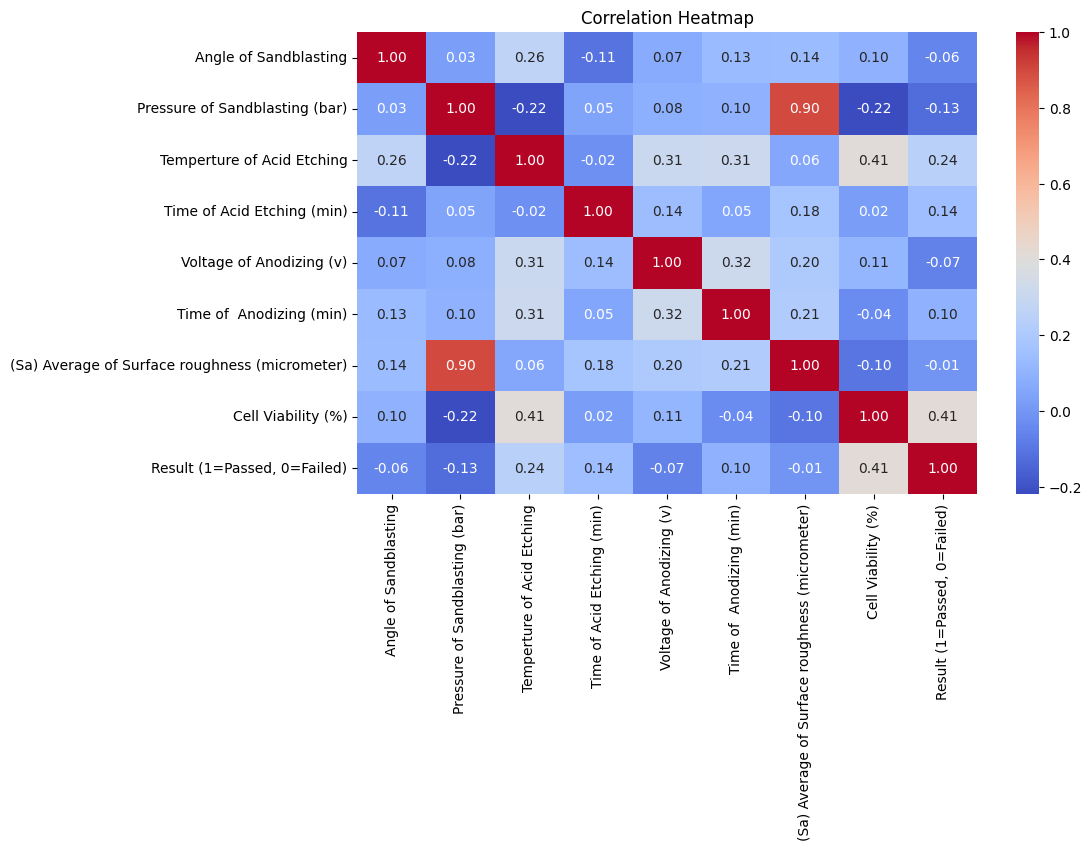

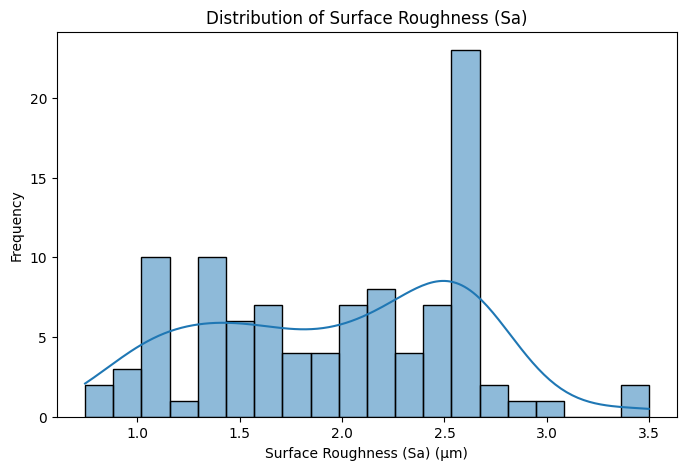

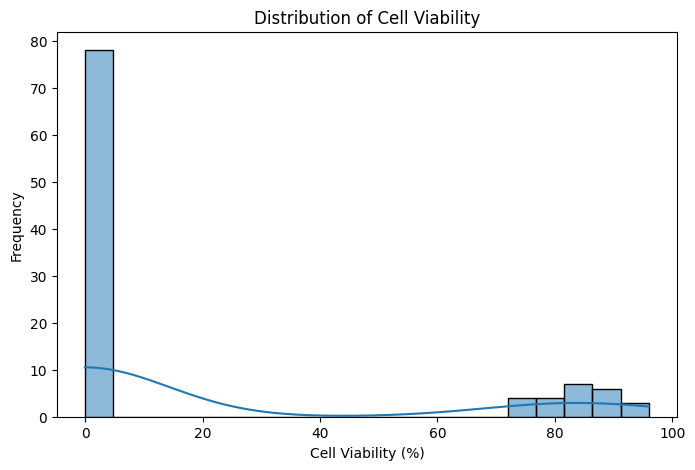

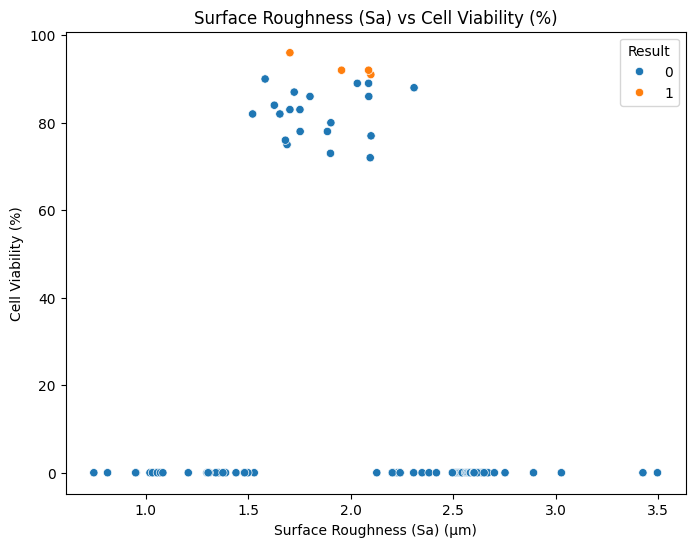

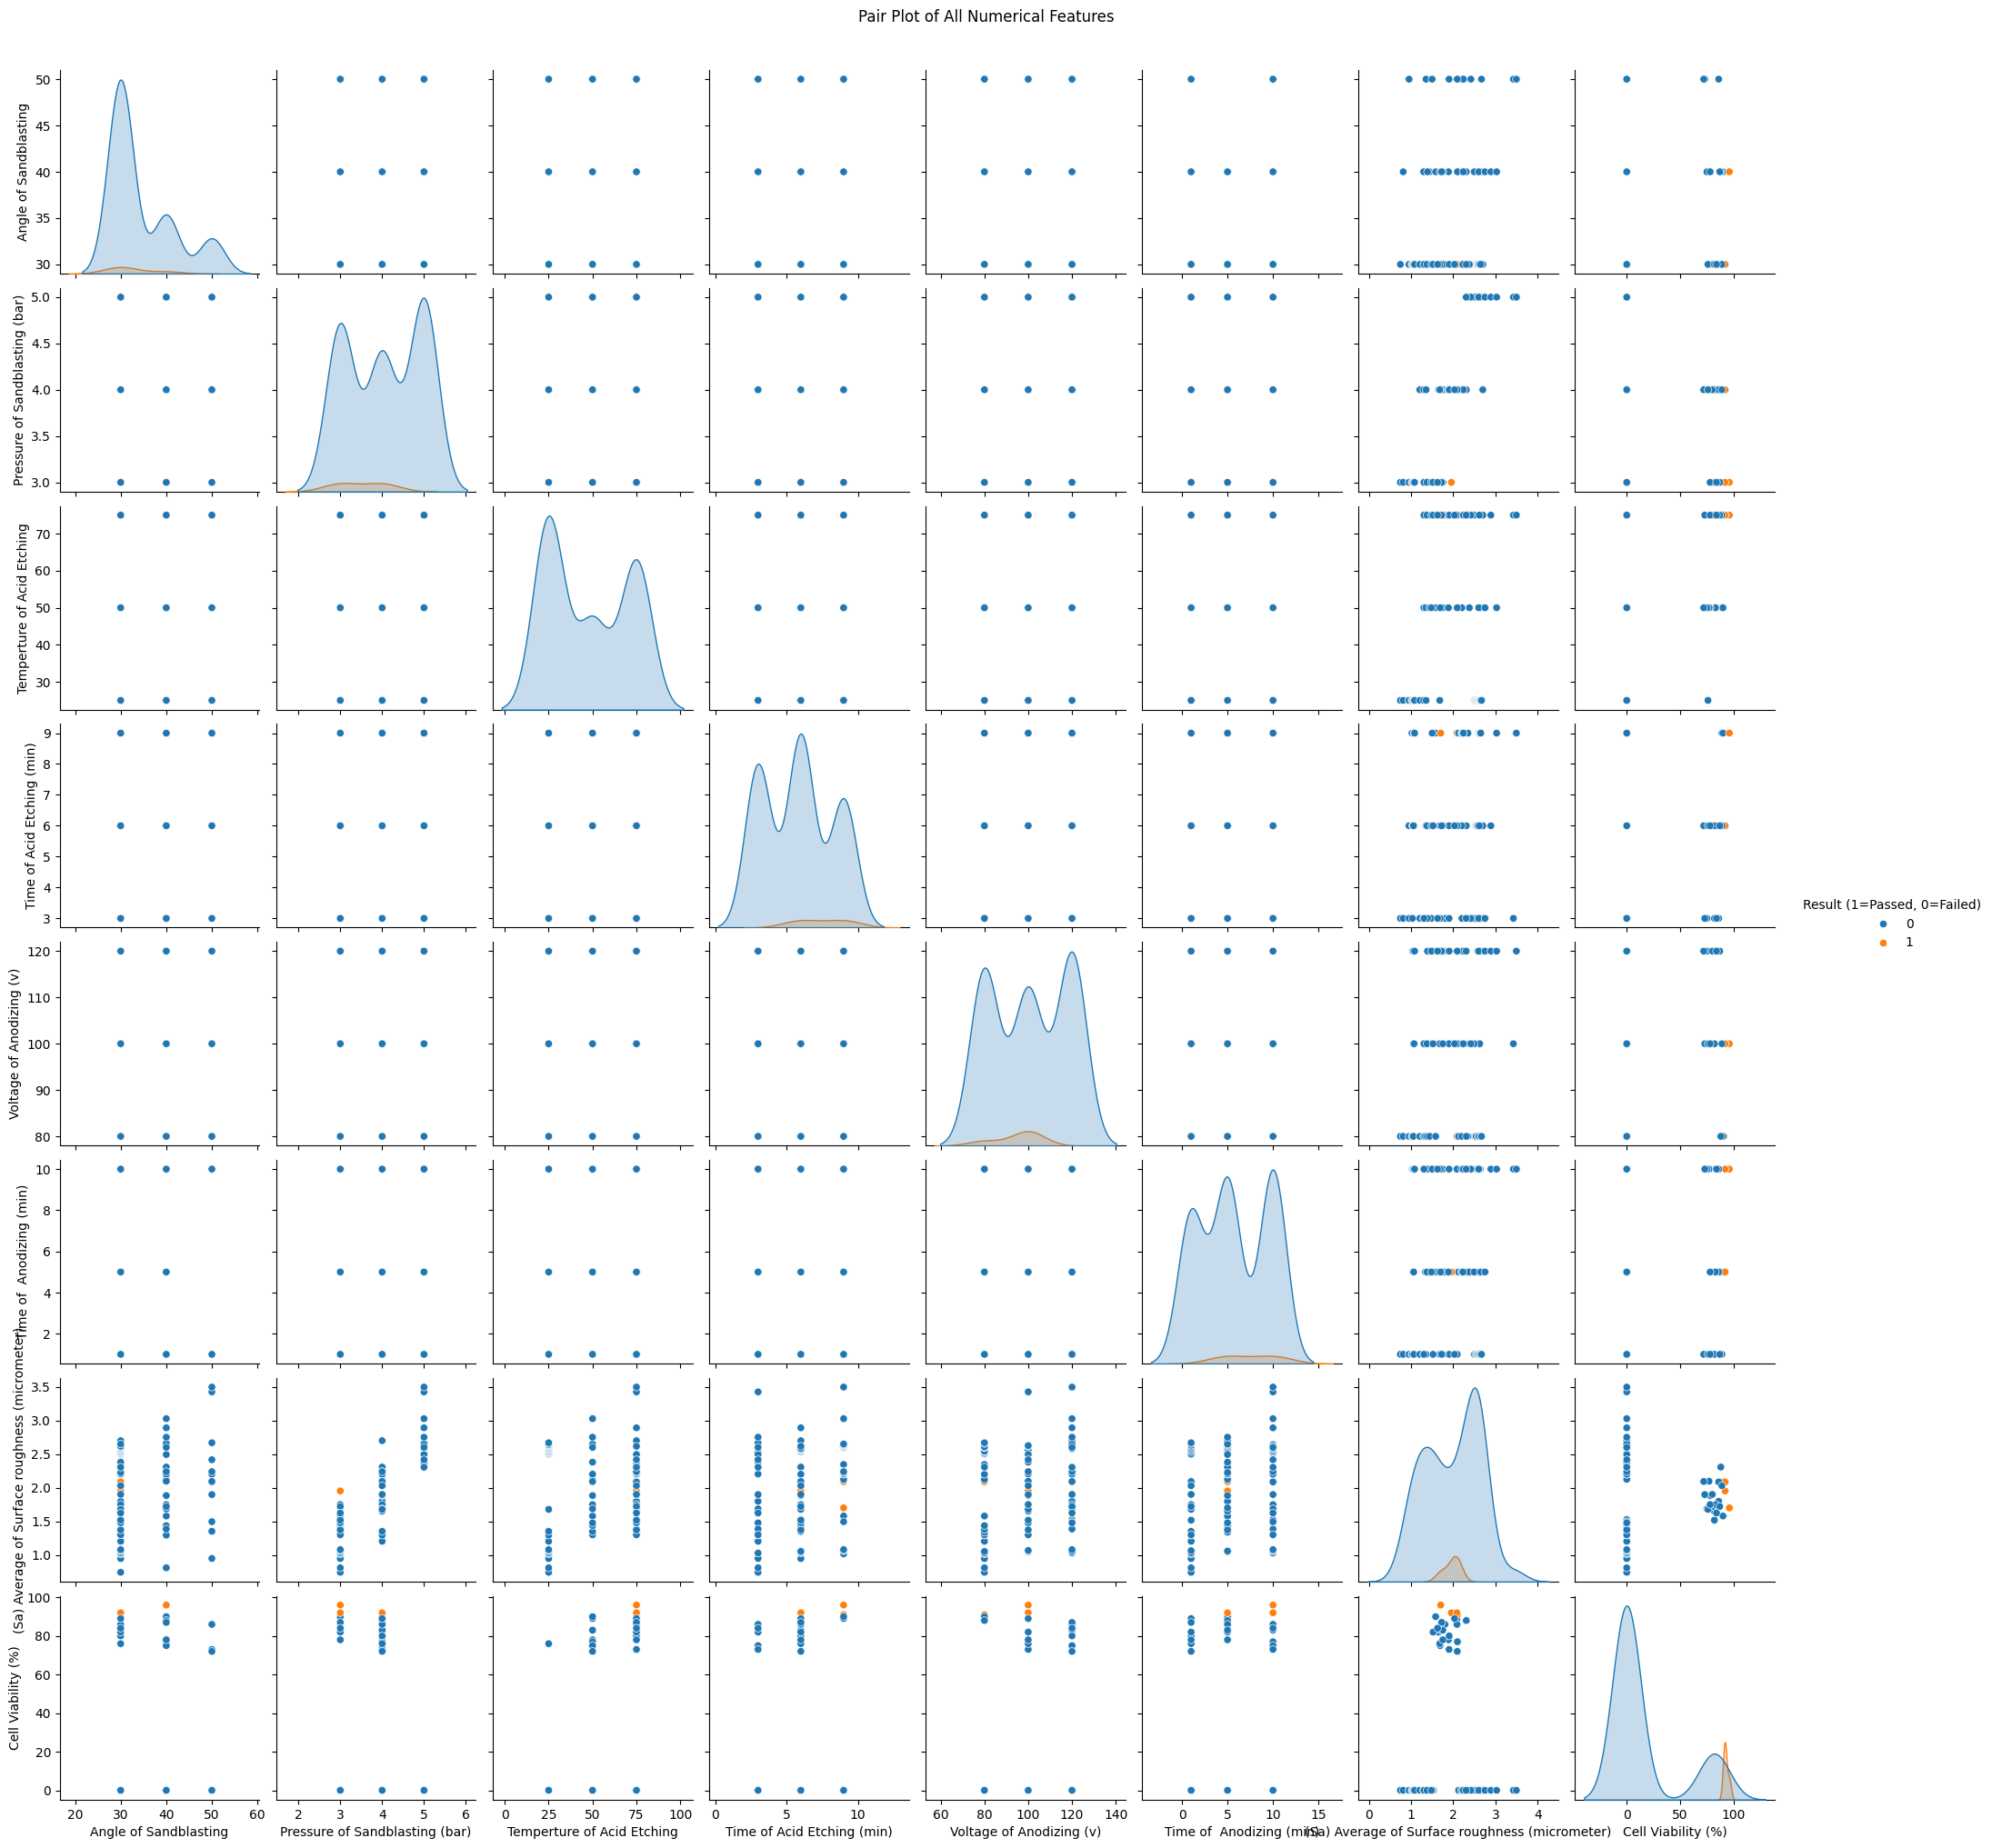

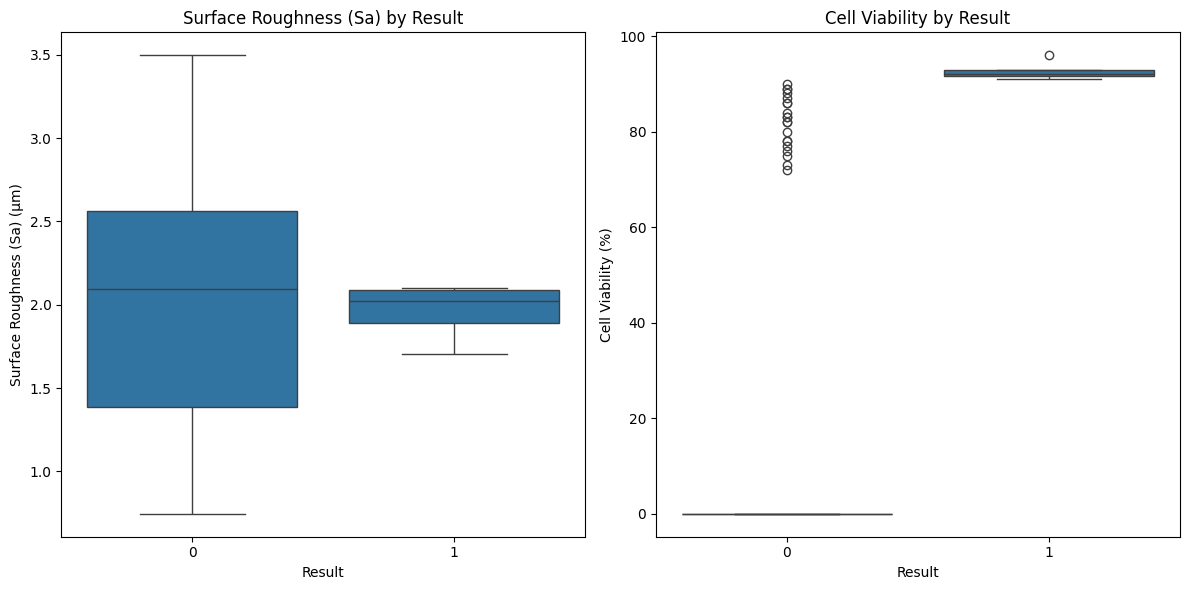

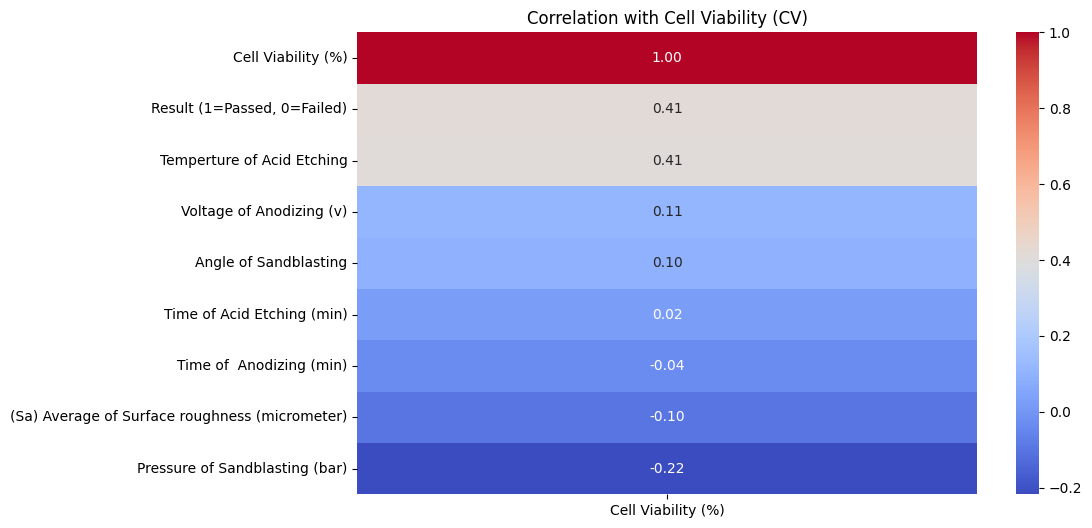

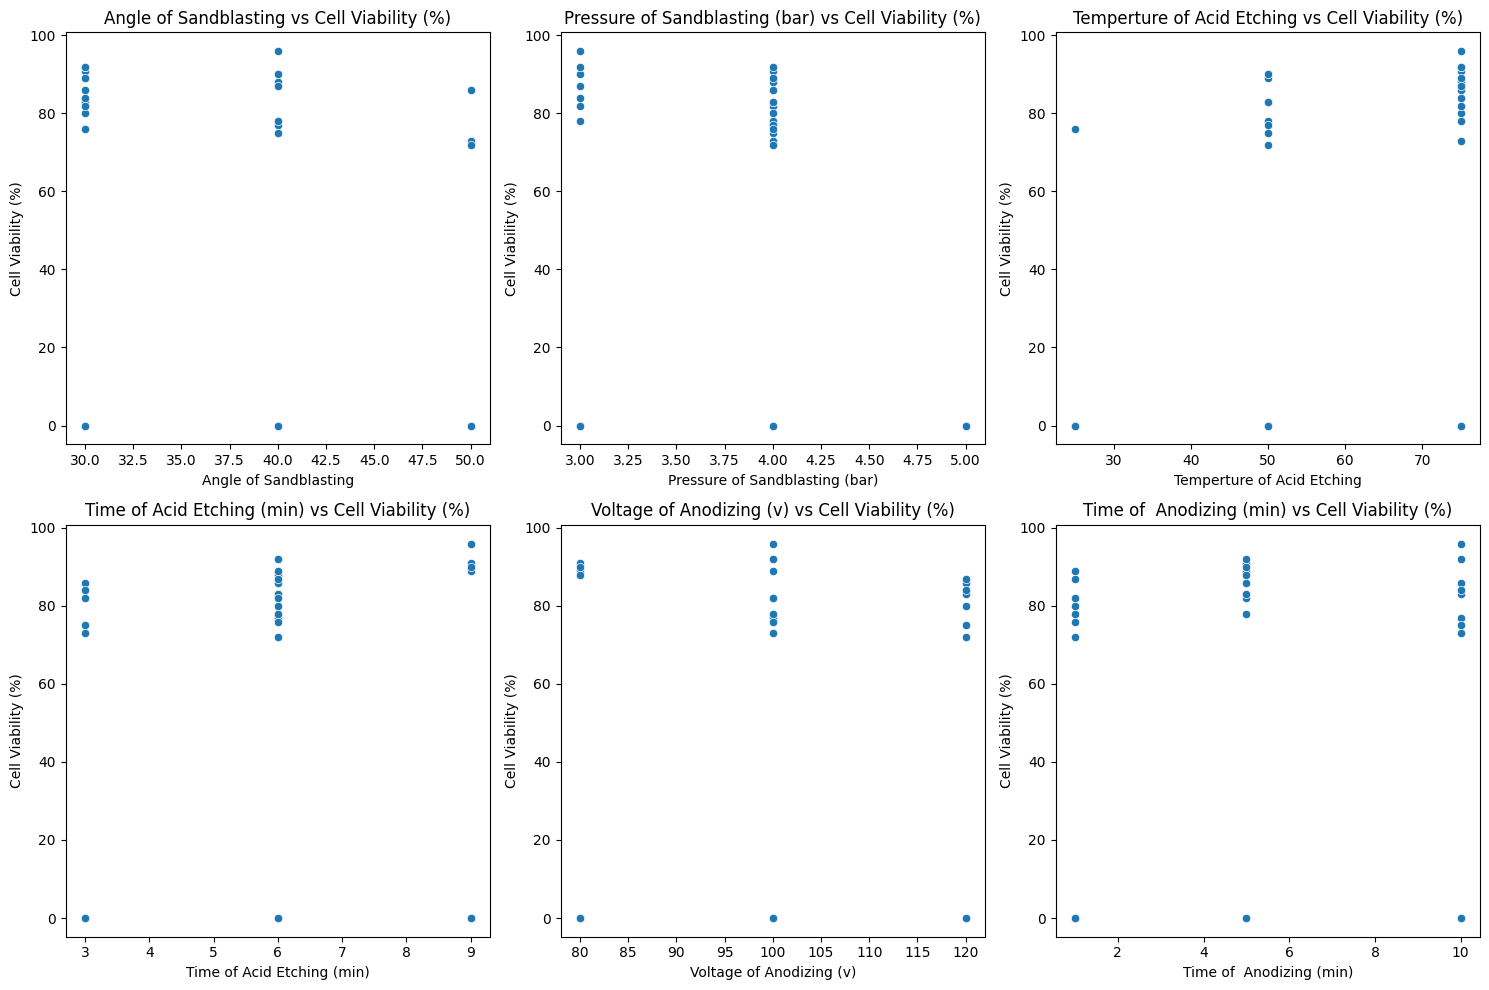

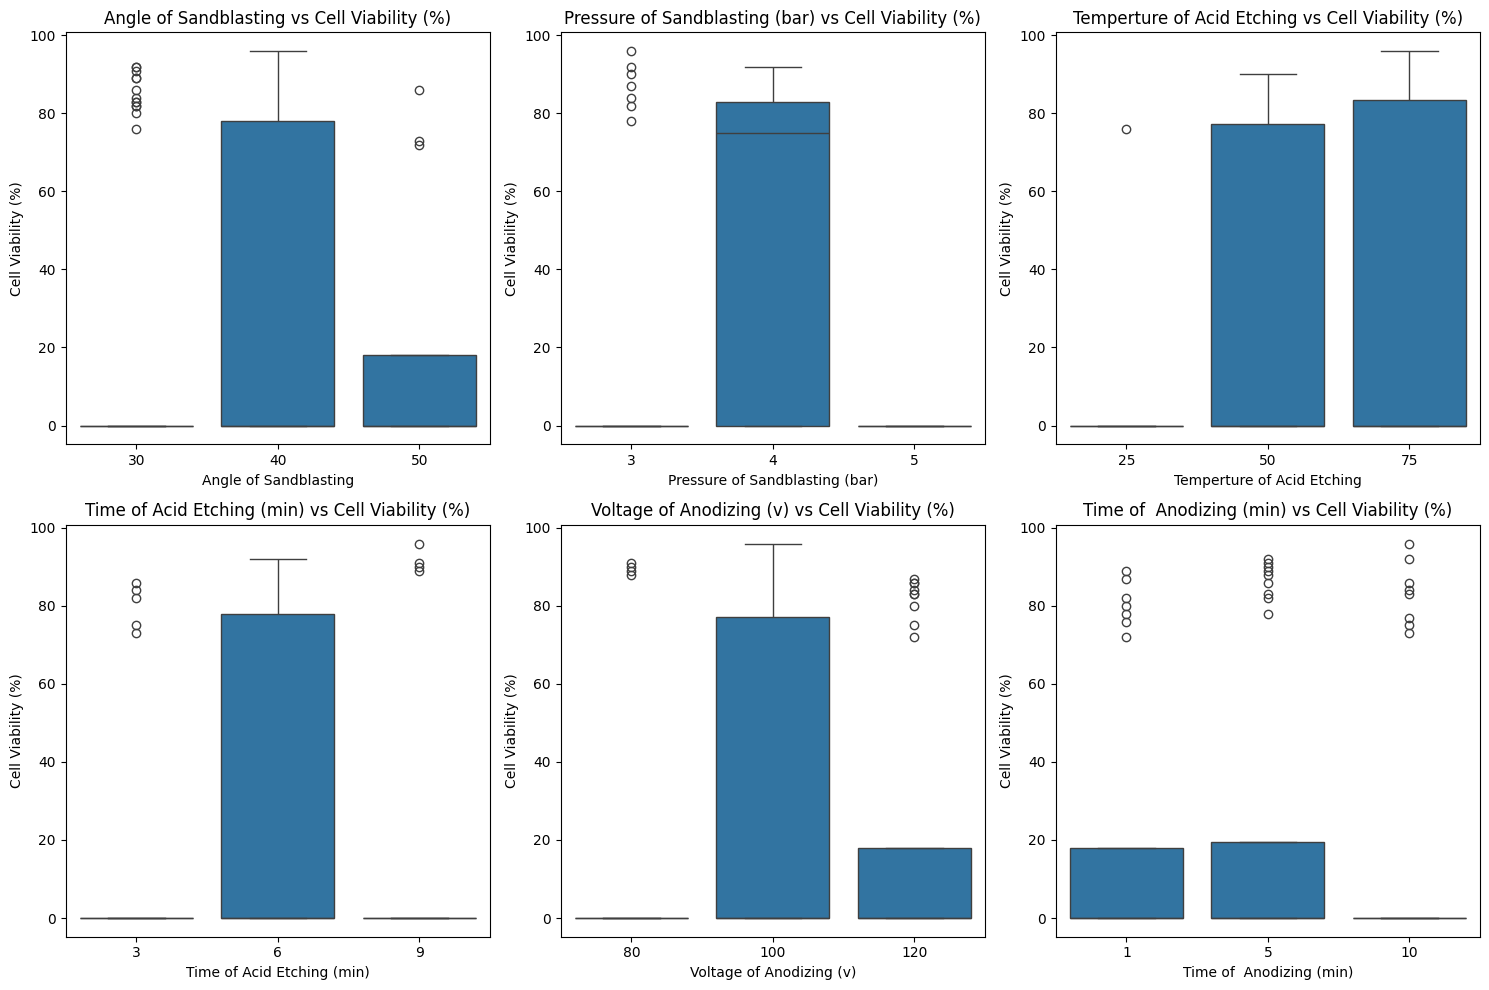

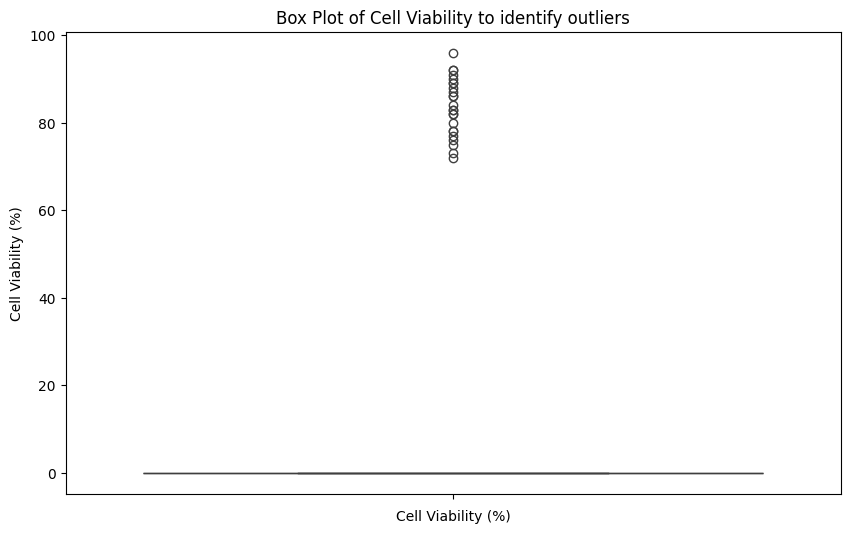

Outliers in Cell Viability (Top 1%):


,Angle of Sandblasting,Pressure of Sandblasting (bar),Temperture of Acid Etching,Time of Acid Etching (min),Voltage of Anodizing (v),Time of Anodizing (min),(Sa) Average of Surface roughness (micrometer),Cell Viability (%),"Result (1=Passed, 0=Failed)"
61,40,3,75,9,100,10,1.703,96,1


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Load the dataset
DATA_PATH = 'data/Sandblasting-Condition.csv'
data = pd.read_csv(DATA_PATH)

# Display first few rows of the dataset
print("First few rows of the dataset:")
display(data.head())

# Data shape
print(f"\nData shape: {data.shape}")

# Data types and basic info
print("\nData info:")
data.info()

# Display data types of each column
print("\nData types:")
print(data.dtypes)

# Summary statistics
print("\nSummary statistics:")
display(data.describe(include='all'))

# Check for missing values
print("\nMissing values by column:")
print(data.isnull().sum())

# Handling non-numeric values
# Convert appropriate columns to numeric, forcing errors to NaN
cols_to_convert = [
    'Pressure of Sandblasting (bar)',
    'Temperture of Acid Etching',
    'Time of Acid Etching (min)',
    'Voltage of Anodizing (v)',
    'Time of  Anodizing (min)',
    '(Sa) Average of Surface roughness (micrometer)',
    'Cell Viability (%)'
]

data[cols_to_convert] = data[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values in these columns
data = data.dropna(subset=cols_to_convert)

# Confirm that non-numeric values are handled
print("\nData types after cleaning:")
print(data.dtypes)

# Filter data according to the given validation ranges
valid_data = data[(data['(Sa) Average of Surface roughness (micrometer)'] > 1.5) &
                  (data['(Sa) Average of Surface roughness (micrometer)'] < 2.5)]

# Set "Cell Viability (%)" to 0 where Sa is outside the valid range
data.loc[~data.index.isin(valid_data.index), 'Cell Viability (%)'] = 0

# Set Result (1=Passed, 0=Failed) based on Cell Viability threshold
data['Result (1=Passed, 0=Failed)'] = np.where(data['Cell Viability (%)'] > 90, 1, 0)

# Exploratory Data Analysis (EDA)

# 1. Correlation Heatmap: Focus on Sa and Cell Viability
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 2. Distribution of Surface Roughness (Sa)
plt.figure(figsize=(8, 5))
sns.histplot(data['(Sa) Average of Surface roughness (micrometer)'], kde=True, bins=20)
plt.title("Distribution of Surface Roughness (Sa)")
plt.xlabel("Surface Roughness (Sa) (µm)")
plt.ylabel("Frequency")
plt.show()

# 3. Distribution of Cell Viability
plt.figure(figsize=(8, 5))
sns.histplot(data['Cell Viability (%)'], kde=True, bins=20)
plt.title("Distribution of Cell Viability")
plt.xlabel("Cell Viability (%)")
plt.ylabel("Frequency")
plt.show()

# 4. Scatter Plot: Surface Roughness vs Cell Viability
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['(Sa) Average of Surface roughness (micrometer)'], y=data['Cell Viability (%)'], hue=data['Result (1=Passed, 0=Failed)'])
plt.title("Surface Roughness (Sa) vs Cell Viability (%)")
plt.xlabel("Surface Roughness (Sa) (µm)")
plt.ylabel("Cell Viability (%)")
plt.legend(title='Result')
plt.show()

# 5. Pair Plot: Exploring relationships between all numerical features
sns.pairplot(data, hue='Result (1=Passed, 0=Failed)')
plt.suptitle("Pair Plot of All Numerical Features", y=1.02)
plt.show()

# 6. Box Plot: Distribution of Surface Roughness and Cell Viability by Result
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Result (1=Passed, 0=Failed)', y='(Sa) Average of Surface roughness (micrometer)', data=data)
plt.title("Surface Roughness (Sa) by Result")
plt.xlabel("Result")
plt.ylabel("Surface Roughness (Sa) (µm)")

plt.subplot(1, 2, 2)
sns.boxplot(x='Result (1=Passed, 0=Failed)', y='Cell Viability (%)', data=data)
plt.title("Cell Viability by Result")
plt.xlabel("Result")
plt.ylabel("Cell Viability (%)")

plt.tight_layout()
plt.show()

# 7. 3D Scatter Plot: Interactive exploration of the main variables
fig = px.scatter_3d(
    data,
    x='Angle of Sandblasting',
    y='Pressure of Sandblasting (bar)',
    z='(Sa) Average of Surface roughness (micrometer)',
    color='Cell Viability (%)',
    title='3D Scatter Plot: Sandblasting Conditions vs Surface Roughness and Cell Viability'
)
fig.show()

# Additional Analysis for Cell Viability (CV)

# 8. Correlation Matrix focusing on CV
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr()[['Cell Viability (%)']].sort_values(by='Cell Viability (%)', ascending=False), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation with Cell Viability (CV)")
plt.show()

# 9. Scatter Plot: All features vs Cell Viability
features = ['Angle of Sandblasting', 'Pressure of Sandblasting (bar)', 'Temperture of Acid Etching',
            'Time of Acid Etching (min)', 'Voltage of Anodizing (v)', 'Time of  Anodizing (min)']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=data[feature], y=data['Cell Viability (%)'])
    plt.title(f"{feature} vs Cell Viability (%)")
    plt.xlabel(feature)
    plt.ylabel("Cell Viability (%)")
plt.tight_layout()
plt.show()

# 10. Box Plot: Distribution of Cell Viability by different features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=data[feature], y=data['Cell Viability (%)'])
    plt.title(f"{feature} vs Cell Viability (%)")
    plt.xlabel(feature)
    plt.ylabel("Cell Viability (%)")
plt.tight_layout()
plt.show()

# 11. Identify any patterns or anomalies in Cell Viability
plt.figure(figsize=(10, 6))
sns.boxplot(data['Cell Viability (%)'])
plt.title("Box Plot of Cell Viability to identify outliers")
plt.xlabel("Cell Viability (%)")
plt.show()

# 12. Analyze outliers in Cell Viability
outliers = data[data['Cell Viability (%)'] > data['Cell Viability (%)'].quantile(0.99)]
print("Outliers in Cell Viability (Top 1%):")
display(outliers)


### 3. Data Preprocessing
- The data preprocessing stage is crucial to ensure the quality and readiness of the data for model training. This includes handling missing values, normalizing or standardizing features, and splitting the data into training and testing sets.

Missing values:
 Angle of Sandblasting                             0
Pressure of Sandblasting (bar)                    0
Temperture of Acid Etching                        0
Time of Acid Etching (min)                        0
Voltage of Anodizing (v)                          0
Time of  Anodizing (min)                          0
(Sa) Average of Surface roughness (micrometer)    0
Cell Viability (%)                                0
Result (1=Passed, 0=Failed)                       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 9 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Angle of Sandblasting                           102 non-null    int64  
 1   Pressure of Sandblasting (bar)                  102 non-null    int64  
 2   Temperture of Acid Etching                      102 non-null    int64  
 3   Time of 

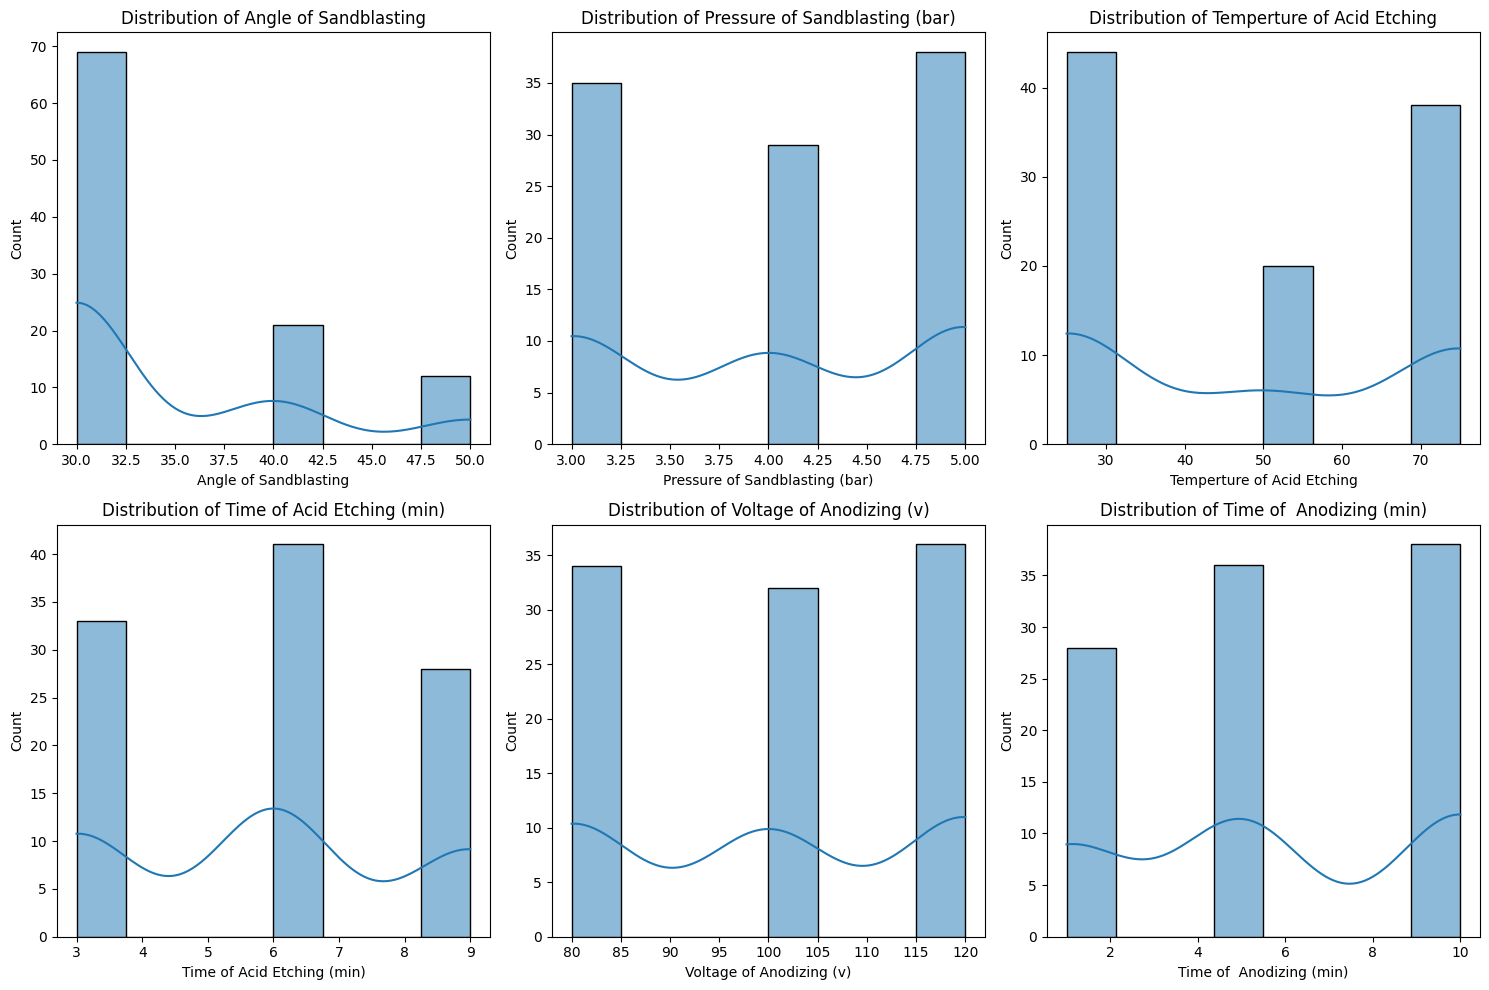

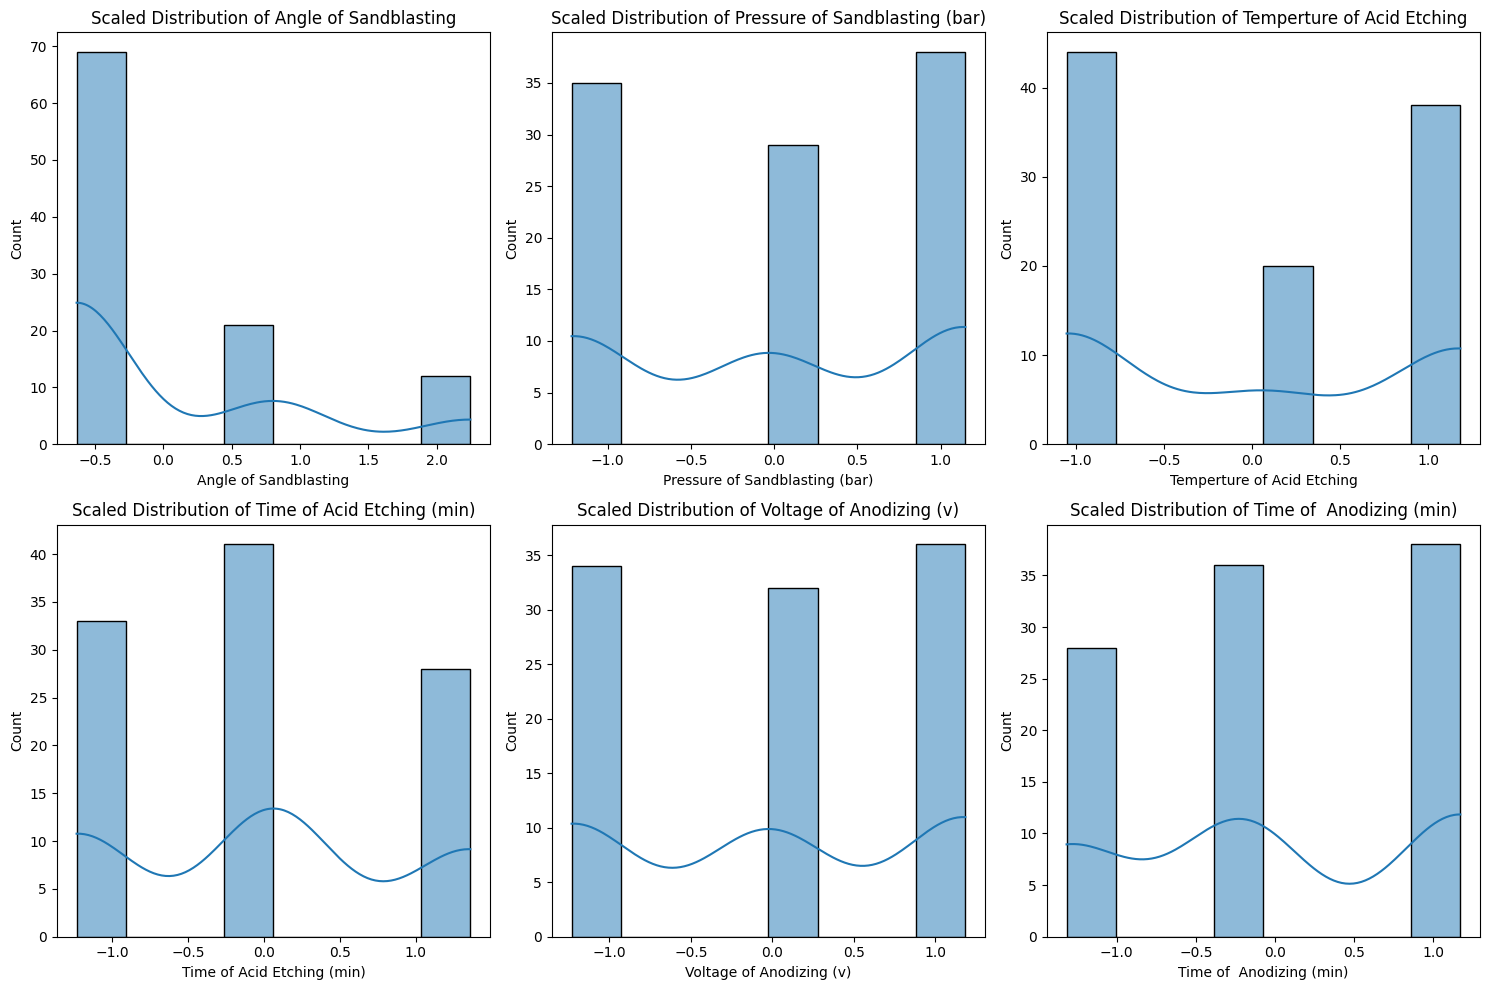

Training set size for Surface Roughness (Sa): (81, 6)
Testing set size for Surface Roughness (Sa): (21, 6)
Training set size for Cell Viability (CV): (81,)
Testing set size for Cell Viability (CV): (21,)


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
DATA_PATH = 'data/Sandblasting-Condition.csv'
data = pd.read_csv(DATA_PATH)

# Handle missing values
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

# Convert appropriate columns to numeric, forcing errors to NaN
cols_to_convert = [
    'Angle of Sandblasting', 
    'Pressure of Sandblasting (bar)', 
    'Temperture of Acid Etching',
    'Time of Acid Etching (min)',
    'Voltage of Anodizing (v)', 
    'Time of  Anodizing (min)', 
    '(Sa) Average of Surface roughness (micrometer)', 
    'Cell Viability (%)'
]

data[cols_to_convert] = data[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Impute missing values using the mean for numeric columns
numeric_cols = data.select_dtypes(include=[np.number]).columns
data_imputed = data.copy()
data_imputed[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Verify if the data has been imputed correctly
print("Data after imputing missing values:\n", data_imputed.info())

# Ensure that the dataset is not empty after imputation
if data_imputed.empty:
    raise ValueError("Dataset is empty after imputing missing values.")

# Filter data according to the given validation ranges for Surface Roughness (Sa)
valid_data = data_imputed[
    (data_imputed['(Sa) Average of Surface roughness (micrometer)'] > 1.5) & 
    (data_imputed['(Sa) Average of Surface roughness (micrometer)'] < 2.5)
]

# Set "Cell Viability (%)" to 0 where Sa is outside the valid range
data_imputed.loc[~data_imputed.index.isin(valid_data.index), 'Cell Viability (%)'] = 0

# Separate features and target variables
feature_columns = [
    'Angle of Sandblasting', 
    'Pressure of Sandblasting (bar)', 
    'Temperture of Acid Etching', 
    'Time of Acid Etching (min)', 
    'Voltage of Anodizing (v)', 
    'Time of  Anodizing (min)'
]
target_column_sa = '(Sa) Average of Surface roughness (micrometer)'
target_column_cv = 'Cell Viability (%)'

# Ensure columns exist in the cleaned dataset
for column in feature_columns + [target_column_sa, target_column_cv]:
    if column not in data_imputed.columns:
        raise ValueError(f"Column {column} not found in dataset.")

X = data_imputed[feature_columns]
y_sa = data_imputed[target_column_sa]
y_cv = data_imputed[target_column_cv]

print("Features (X):\n", X.head())
print("Target (y_sa):\n", y_sa.head())
print("Target (y_cv):\n", y_cv.head())

# Visualize distributions before scaling
plt.figure(figsize=(15, 10))
for i, column in enumerate(feature_columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(X[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Handle outliers in Cell Viability
# Identify outliers using the IQR method
Q1 = y_cv.quantile(0.25)
Q3 = y_cv.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers
y_cv_capped = np.where(y_cv < lower_bound, lower_bound, y_cv)
y_cv_capped = np.where(y_cv_capped > upper_bound, upper_bound, y_cv_capped)

# Normalize or standardize features
scaler = StandardScaler()

# Ensure that features are not empty and have valid shapes
if X.empty or X.shape[0] < 1 or X.shape[1] < 1:
    raise ValueError(f"Features are empty or have invalid shape: {X.shape}")

X_scaled = scaler.fit_transform(X)

# Visualize distributions after scaling
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_columns)
plt.figure(figsize=(15, 10))
for i, column in enumerate(X_scaled_df.columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(X_scaled_df[column], kde=True)
    plt.title(f'Scaled Distribution of {column}')
plt.tight_layout()
plt.show()

# Split the data into training and testing sets for Surface Roughness (Sa) and Cell Viability (CV)
X_train, X_test, y_sa_train, y_sa_test = train_test_split(X_scaled, y_sa, test_size=0.2, random_state=42)
_, _, y_cv_train, y_cv_test = train_test_split(X_scaled, y_cv_capped, test_size=0.2, random_state=42)

print("Training set size for Surface Roughness (Sa):", X_train.shape)
print("Testing set size for Surface Roughness (Sa):", X_test.shape)
print("Training set size for Cell Viability (CV):", y_cv_train.shape)
print("Testing set size for Cell Viability (CV):", y_cv_test.shape)

# Check for any inconsistencies in the data split
if X_train.shape[0] != y_sa_train.shape[0] or X_train.shape[0] != y_cv_train.shape[0]:
    raise ValueError("Mismatch in the number of training samples between features and targets.")
if X_test.shape[0] != y_sa_test.shape[0] or X_test.shape[0] != y_cv_test.shape[0]:
    raise ValueError("Mismatch in the number of testing samples between features and targets.")


### 4. Feature Engineering
- Creating new features from the existing ones to improve the performance of machine learning models. This can include interaction terms, polynomial features, and other derived metrics that may capture additional information

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel

# Load the dataset again to ensure we are working with the latest data
DATA_PATH = 'data/Sandblasting-Condition.csv'
data = pd.read_csv(DATA_PATH)

# Handle missing values
# Convert appropriate columns to numeric, forcing errors to NaN
cols_to_convert = [
    'Angle of Sandblasting', 
    'Pressure of Sandblasting (bar)', 
    'Temperture of Acid Etching',
    'Time of Acid Etching (min)',
    'Voltage of Anodizing (v)', 
    'Time of  Anodizing (min)', 
    '(Sa) Average of Surface roughness (micrometer)', 
    'Cell Viability (%)'
]

data[cols_to_convert] = data[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Impute missing values using the mean for numeric columns
numeric_cols = data.select_dtypes(include=[np.number]).columns
data_imputed = data.copy()
data_imputed[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Define feature and target columns
feature_columns = [
    'Angle of Sandblasting', 
    'Pressure of Sandblasting (bar)', 
    'Temperture of Acid Etching', 
    'Time of Acid Etching (min)', 
    'Voltage of Anodizing (v)', 
    'Time of  Anodizing (min)'
]
target_column_sa = '(Sa) Average of Surface roughness (micrometer)'
target_column_cv = 'Cell Viability (%)'

X = data_imputed[feature_columns]
y_sa = data_imputed[target_column_sa]
y_cv = data_imputed[target_column_cv]

# Check for multicollinearity using VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print("\nVIF before feature selection:\n", vif_data)

# Normalize or standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature selection using Lasso with increased iterations
lasso = LassoCV(max_iter=10000)
lasso.fit(X_scaled, y_sa)
model = SelectFromModel(lasso, prefit=True)
X_selected = model.transform(X_scaled)

selected_features = np.array(feature_columns)[model.get_support()]
print("Selected Features:\n", selected_features)

# Split the data into training and testing sets for both targets
X_train, X_test, y_sa_train, y_sa_test = train_test_split(X_selected, y_sa, test_size=0.2, random_state=42)
_, _, y_cv_train, y_cv_test = train_test_split(X_selected, y_cv, test_size=0.2, random_state=42)

print("Training set size after feature engineering:", X_train.shape)
print("Testing set size after feature engineering:", X_test.shape)
print("Training set size for Surface Roughness (Sa):", y_sa_train.shape)
print("Testing set size for Surface Roughness (Sa):", y_sa_test.shape)
print("Training set size for Cell Viability (CV):", y_cv_train.shape)
print("Testing set size for Cell Viability (CV):", y_cv_test.shape)

# Check for any inconsistencies in the data split
if X_train.shape[0] != y_sa_train.shape[0] or X_train.shape[0] != y_cv_train.shape[0]:
    raise ValueError("Mismatch in the number of training samples between features and targets.")
if X_test.shape[0] != y_sa_test.shape[0] or X_test.shape[0] != y_cv_test.shape[0]:
    raise ValueError("Mismatch in the number of testing samples between features and targets.")



VIF before feature selection:
                           feature        VIF
0           Angle of Sandblasting  21.279027
1  Pressure of Sandblasting (bar)  20.714752
2      Temperture of Acid Etching   7.710158
3      Time of Acid Etching (min)   7.242012
4        Voltage of Anodizing (v)  32.997896
5        Time of  Anodizing (min)   4.169461
Selected Features:
 ['Angle of Sandblasting' 'Pressure of Sandblasting (bar)'
 'Temperture of Acid Etching' 'Time of Acid Etching (min)'
 'Voltage of Anodizing (v)' 'Time of  Anodizing (min)']
Training set size after feature engineering: (81, 6)
Testing set size after feature engineering: (21, 6)
Training set size for Surface Roughness (Sa): (81,)
Testing set size for Surface Roughness (Sa): (21,)
Training set size for Cell Viability (CV): (81,)
Testing set size for Cell Viability (CV): (21,)


### 5. Model Training
- To identify the best model for predicting optimal sandblasting conditions for dental implants, we will experiment with various machine learning models. This includes Linear Regression, Random Forest, Gradient Boosting, and Neural Networks .

Training Ridge...
Ridge - MAE (Sa): 0.1982, MAE (CV): 30.1883
Training RidgeCV...
RidgeCV - MAE (Sa): 0.2027, MAE (CV): 29.3015
Training ElasticNet...
ElasticNet - MAE (Sa): 0.5174, MAE (CV): 29.1297
Training ElasticNetCV...
ElasticNetCV - MAE (Sa): 0.1902, MAE (CV): 28.9994
Training BayesianRidge...
BayesianRidge - MAE (Sa): 0.2000, MAE (CV): 29.5427
Training HuberRegressor...
HuberRegressor - MAE (Sa): 0.2019, MAE (CV): 27.6807
Training RandomForest...
RandomForest - MAE (Sa): 0.1627, MAE (CV): 26.6596
Training GradientBoosting...
GradientBoosting - MAE (Sa): 0.1721, MAE (CV): 27.9170

Model Performance:
                   MAE (Sa)   MAE (CV)
Ridge             0.198171  30.188328
RidgeCV           0.202682  29.301544
ElasticNet        0.517418  29.129665
ElasticNetCV      0.190199  28.999424
BayesianRidge     0.200031  29.542701
HuberRegressor    0.201918  27.680707
RandomForest      0.162699  26.659616
GradientBoosting  0.172130  27.917034

Best Model for Surface Roughness (Sa): Ran

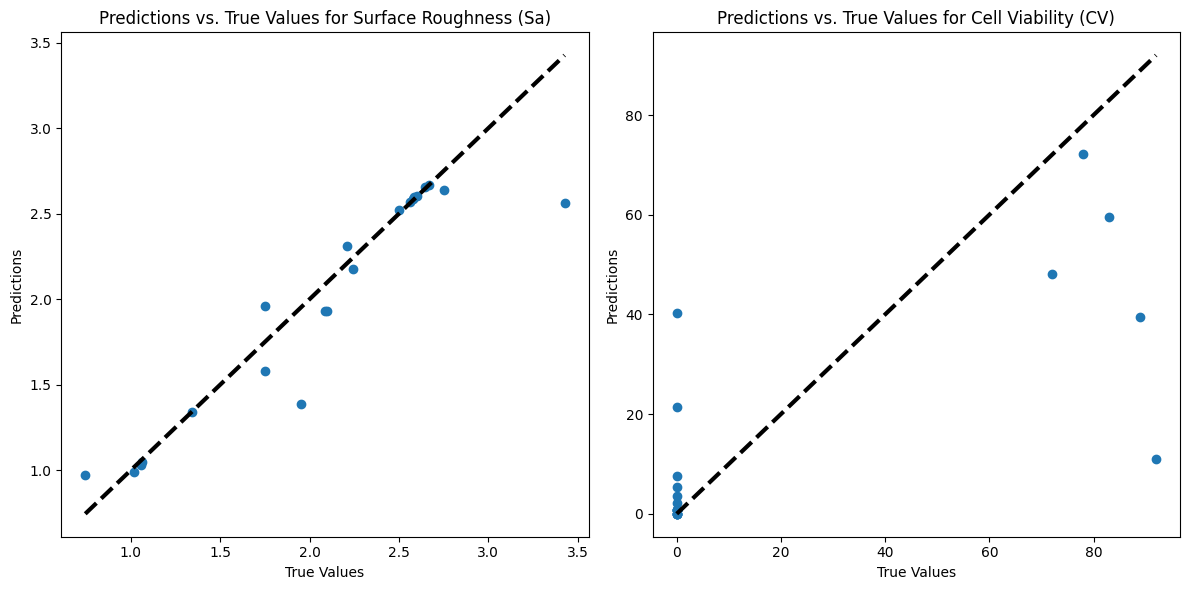

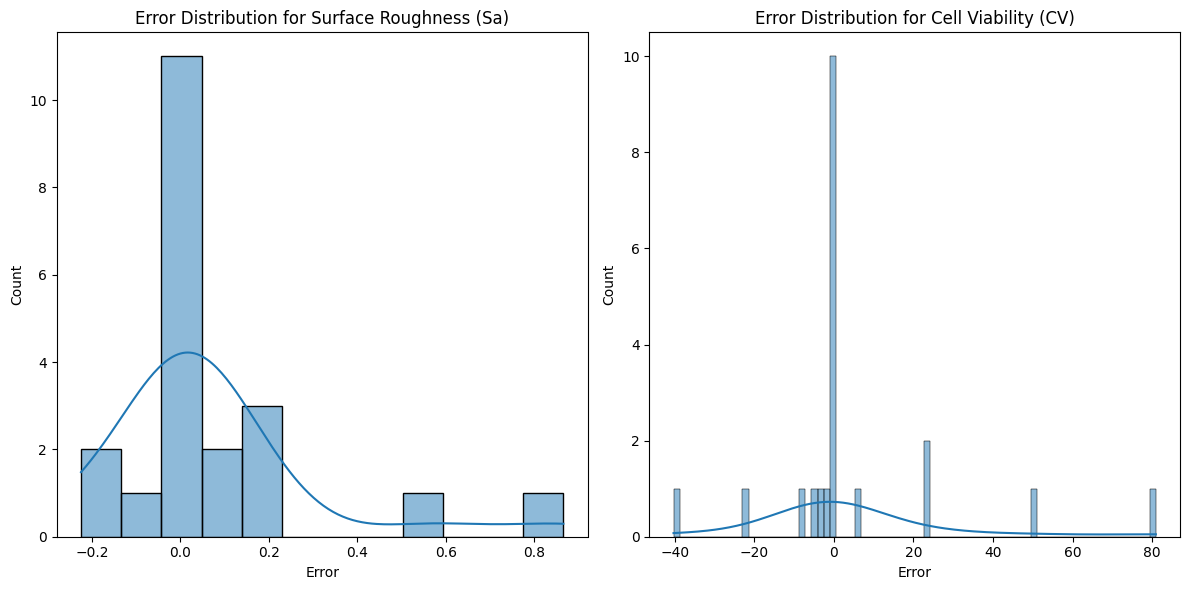

In [11]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, ElasticNetCV, BayesianRidge, HuberRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define models with adjusted parameters
models = {
    "Ridge": Ridge(),
    "RidgeCV": RidgeCV(),
    "ElasticNet": ElasticNet(max_iter=10000),                      # Increased max_iter for better convergence
    "ElasticNetCV": ElasticNetCV(max_iter=10000),                  # Increased max_iter for better convergence
    "BayesianRidge": BayesianRidge(),
    "HuberRegressor": HuberRegressor(max_iter=10000),              # Increased max_iter for better convergence
    "RandomForest": RandomForestRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42)
}

# Initialize dictionary to store model performance
model_performance = {}

# Define SMAPE function
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true) + 1e-10))

# Evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    # Cross-validation for Surface Roughness (Sa) with parallel processing
    cv_scores_sa = cross_val_score(model, X_train, y_sa_train, cv=2, scoring='neg_mean_absolute_error', n_jobs=-1)
    mae_sa = -cv_scores_sa.mean()
    
    # Cross-validation for Cell Viability (CV) with parallel processing
    cv_scores_cv = cross_val_score(model, X_train, y_cv_train, cv=2, scoring='neg_mean_absolute_error', n_jobs=-1)
    mae_cv = -cv_scores_cv.mean()
    
    # Store results
    model_performance[model_name] = {
        "MAE (Sa)": mae_sa,
        "MAE (CV)": mae_cv
    }
    
    print(f"{model_name} - MAE (Sa): {mae_sa:.4f}, MAE (CV): {mae_cv:.4f}")

# Convert performance to DataFrame
performance_df = pd.DataFrame(model_performance).T
print("\nModel Performance:\n", performance_df)

# Train the best model for Surface Roughness (Sa) on the entire training set and evaluate on the test set
best_model_name_sa = performance_df['MAE (Sa)'].idxmin()
best_model_sa = models[best_model_name_sa]
best_model_sa.fit(X_train, y_sa_train)
y_sa_pred = best_model_sa.predict(X_test)

# Evaluate the best model for Surface Roughness (Sa) on the test set
test_mae_sa = mean_absolute_error(y_sa_test, y_sa_pred)
test_rmse_sa = np.sqrt(mean_squared_error(y_sa_test, y_sa_pred))
test_r2_sa = r2_score(y_sa_test, y_sa_pred)
test_smape_sa = smape(y_sa_test, y_sa_pred)
test_medae_sa = median_absolute_error(y_sa_test, y_sa_pred)

print(f"\nBest Model for Surface Roughness (Sa): {best_model_name_sa}")
print(f"Test MAE (Sa): {test_mae_sa:.4f}")
print(f"Test RMSE (Sa): {test_rmse_sa:.4f}")
print(f"Test R2 (Sa): {test_r2_sa:.4f}")
print(f"Test SMAPE (Sa): {test_smape_sa:.4f}")
print(f"Test MedAE (Sa): {test_medae_sa:.4f}")

# Train the best model for Cell Viability (CV) on the entire training set and evaluate on the test set
best_model_name_cv = performance_df['MAE (CV)'].idxmin()
best_model_cv = models[best_model_name_cv]
best_model_cv.fit(X_train, y_cv_train)
y_cv_pred = best_model_cv.predict(X_test)

# Evaluate the best model for Cell Viability (CV) on the test set
test_mae_cv = mean_absolute_error(y_cv_test, y_cv_pred)
test_rmse_cv = np.sqrt(mean_squared_error(y_cv_test, y_cv_pred))
test_r2_cv = r2_score(y_cv_test, y_cv_pred)
test_smape_cv = smape(y_cv_test, y_cv_pred)
test_medae_cv = median_absolute_error(y_cv_test, y_cv_pred)

print(f"\nBest Model for Cell Viability (CV): {best_model_name_cv}")
print(f"Test MAE (CV): {test_mae_cv:.4f}")
print(f"Test RMSE (CV): {test_rmse_cv:.4f}")
print(f"Test R2 (CV): {test_r2_cv:.4f}")
print(f"Test SMAPE (CV): {test_smape_cv:.4f}")
print(f"Test MedAE (CV): {test_medae_cv:.4f}")

# Adding Stacking Ensemble for Surface Roughness (Sa)

# Define the base models
base_models = [
    ('ridge', Ridge()),
    ('rf', RandomForestRegressor(random_state=42)),
    ('gbr', GradientBoostingRegressor(random_state=42))
]

# Define the meta-model
meta_model = Ridge()

# Create the stacking ensemble
stacking_ensemble = StackingRegressor(estimators=base_models, final_estimator=meta_model, n_jobs=-1)

# Train the stacking ensemble on Surface Roughness (Sa)
stacking_ensemble.fit(X_train, y_sa_train)

# Predict on the test set
y_sa_pred_stack = stacking_ensemble.predict(X_test)

# Evaluate the ensemble model
test_mae_sa_stack = mean_absolute_error(y_sa_test, y_sa_pred_stack)
test_rmse_sa_stack = np.sqrt(mean_squared_error(y_sa_test, y_sa_pred_stack))
test_r2_sa_stack = r2_score(y_sa_test, y_sa_pred_stack)
test_smape_sa_stack = smape(y_sa_test, y_sa_pred_stack)
test_medae_sa_stack = median_absolute_error(y_sa_test, y_sa_pred_stack)

print(f"\nStacking Ensemble - Test MAE (Sa): {test_mae_sa_stack:.4f}")
print(f"Stacking Ensemble - Test RMSE (Sa): {test_rmse_sa_stack:.4f}")
print(f"Stacking Ensemble - Test R2 (Sa): {test_r2_sa_stack:.4f}")
print(f"Stacking Ensemble - Test SMAPE (Sa): {test_smape_sa_stack:.4f}")
print(f"Stacking Ensemble - Test MedAE (Sa): {test_medae_sa_stack:.4f}")

# Visualizations

# Predictions vs. True Values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_sa_test, y_sa_pred)
plt.plot([y_sa_test.min(), y_sa_test.max()], [y_sa_test.min(), y_sa_test.max()], 'k--', lw=3)
plt.title("Predictions vs. True Values for Surface Roughness (Sa)")
plt.xlabel("True Values")
plt.ylabel("Predictions")

plt.subplot(1, 2, 2)
plt.scatter(y_cv_test, y_cv_pred)
plt.plot([y_cv_test.min(), y_cv_test.max()], [y_cv_test.min(), y_cv_test.max()], 'k--', lw=3)
plt.title("Predictions vs. True Values for Cell Viability (CV)")
plt.xlabel("True Values")
plt.ylabel("Predictions")

plt.tight_layout()
plt.show()

# Error Distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(y_sa_test - y_sa_pred, kde=True)
plt.title("Error Distribution for Surface Roughness (Sa)")
plt.xlabel("Error")

plt.subplot(1, 2, 2)
sns.histplot(y_cv_test - y_cv_pred, kde=True)
plt.title("Error Distribution for Cell Viability (CV)")
plt.xlabel("Error")

plt.tight_layout()
plt.show()


### 6.Hyperparameter Tuning : 
- Hyperparameter tuning aims to find the best set of hyperparameters for a machine learning model to optimize its performance. Here’s how to perform hyperparameter tuning for the Random Forest and Gradient Boosting models.

|   iter    |  target   | learni... | max_depth | n_esti... | subsample |
-------------------------------------------------------------------------
| 1         | -0.1103   | 0.08116   | 6.803     | 159.8     | 0.9197    |
| 2         | -0.1531   | 0.03964   | 3.624     | 58.71     | 0.9732    |
| 3         | -0.1201   | 0.1242    | 5.832     | 53.09     | 0.994     |
| 4         | -0.1201   | 0.1682    | 3.849     | 77.27     | 0.8367    |
| 5         | -0.1161   | 0.06781   | 5.099     | 114.8     | 0.8582    |
| 6         | -0.1161   | 0.1475    | 4.98      | 114.8     | 0.8821    |
| 7         | -0.1196   | 0.1188    | 4.47      | 154.7     | 1.0       |
| 8         | -0.1117   | 0.05754   | 3.684     | 164.3     | 0.8136    |
| 9         | -0.1095   | 0.2       | 7.0       | 170.2     | 1.0       |
| 10        | -0.1839   | 0.01      | 3.0       | 176.0     | 0.8       |
| 11        | -0.1095   | 0.2       | 7.0       | 165.9     | 1.0       |
| 12        | -0.1121   | 0.04502   | 

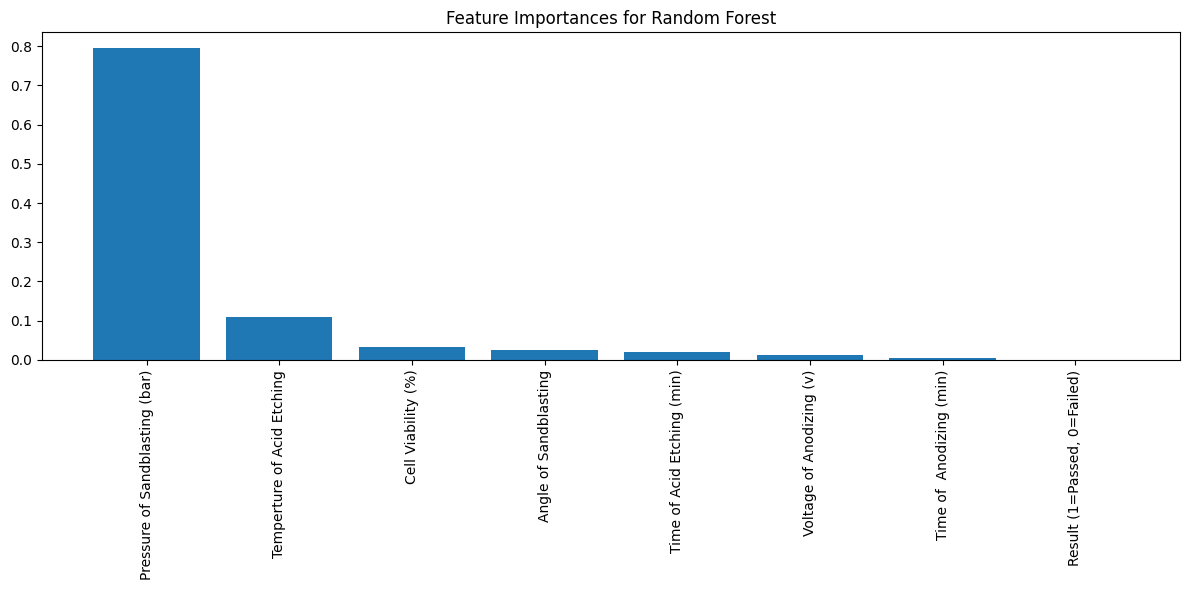

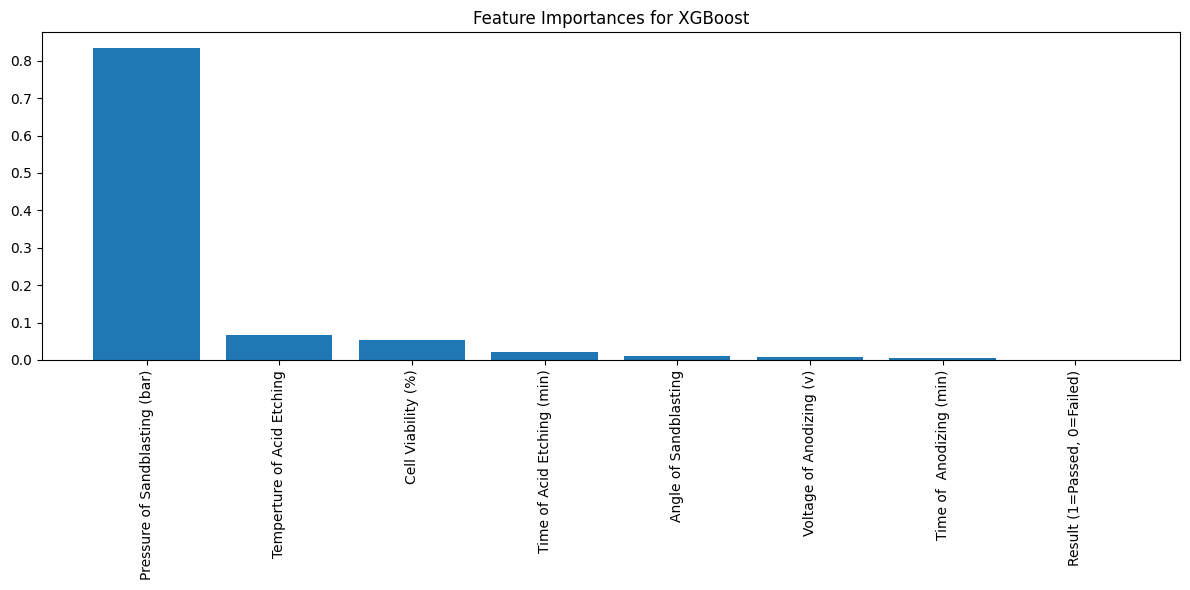

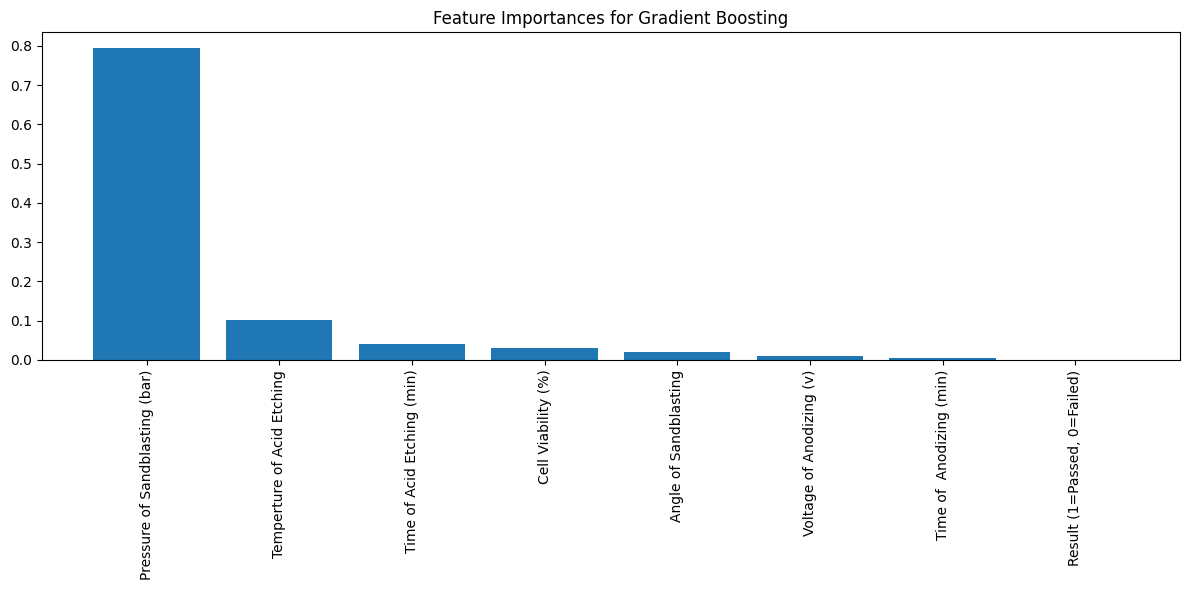

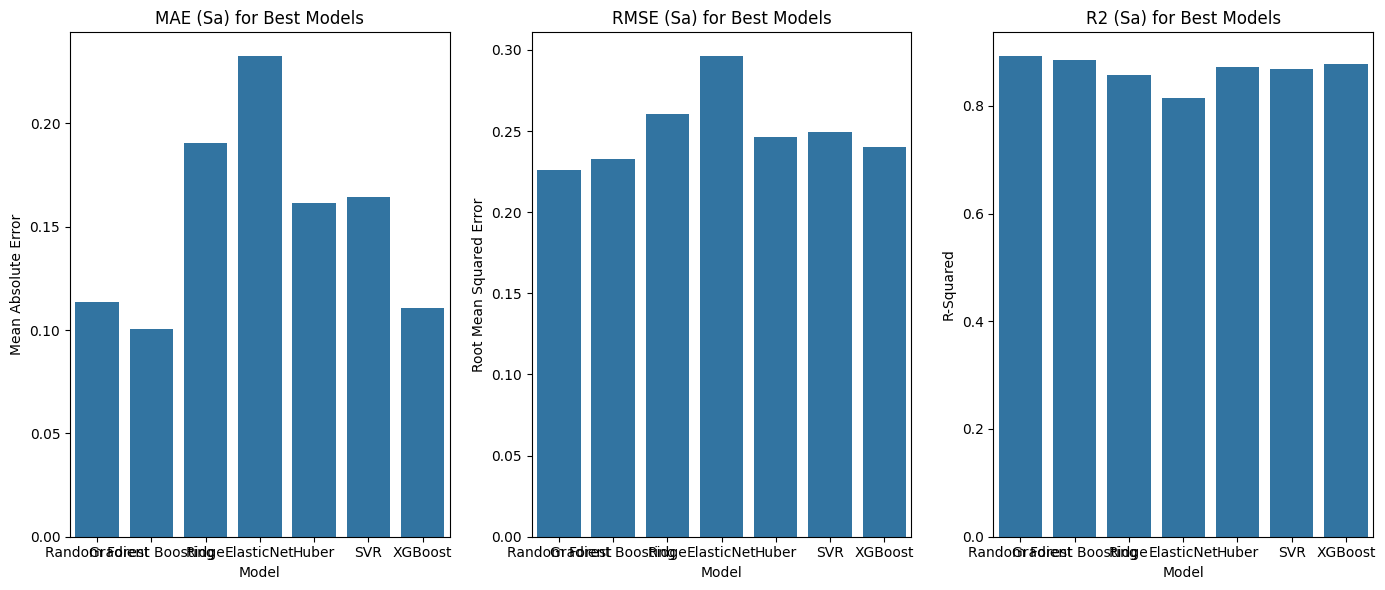

In [14]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge, ElasticNet, HuberRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
from sklearn.model_selection import GridSearchCV
from bayes_opt import BayesianOptimization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
DATA_PATH = 'data/Sandblasting-Condition.csv'
data = pd.read_csv(DATA_PATH)

# Define features and target
X = data.drop(['(Sa) Average of Surface roughness (micrometer)'], axis=1)
y_sa = data['(Sa) Average of Surface roughness (micrometer)']

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_sa_train, y_sa_test = train_test_split(X, y_sa, test_size=0.2, random_state=42)

# Define SMAPE function
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true) + 1e-10))

# Define hyperparameter grids
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_ridge = {
    'alpha': [0.1, 1.0, 10.0, 100.0]
}

param_grid_elasticnet = {
    'alpha': [0.1, 1.0, 10.0],
    'l1_ratio': [0.1, 0.5, 0.9]
}

param_grid_huber = {
    'epsilon': [1.1, 1.2, 1.35, 1.5, 1.75],
    'max_iter': [100, 200, 500]
}

param_grid_svr = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.2],
    'kernel': ['linear', 'rbf']
}

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0]
}

# Initialize GridSearchCV for each model
grid_search_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2
)

grid_search_ridge = GridSearchCV(
    estimator=Ridge(),
    param_grid=param_grid_ridge,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2
)

grid_search_elasticnet = GridSearchCV(
    estimator=ElasticNet(),
    param_grid=param_grid_elasticnet,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2
)

grid_search_huber = GridSearchCV(
    estimator=HuberRegressor(),
    param_grid=param_grid_huber,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2
)

grid_search_svr = GridSearchCV(
    estimator=SVR(),
    param_grid=param_grid_svr,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2
)

grid_search_xgb = GridSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_grid=param_grid_xgb,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2
)

# Define the function to optimize with Bayesian Optimization
def gbm_evaluate(n_estimators, learning_rate, max_depth, subsample):
    params = {
        'n_estimators': int(n_estimators),
        'learning_rate': learning_rate,
        'max_depth': int(max_depth),
        'subsample': subsample
    }
    gbm = GradientBoostingRegressor(random_state=42, **params)
    gbm.fit(X_train, y_sa_train)
    y_pred = gbm.predict(X_test)
    return -mean_absolute_error(y_sa_test, y_pred)

# Define the parameter bounds
param_bounds_gbm = {
    'n_estimators': (50, 200),
    'learning_rate': (0.01, 0.2),
    'max_depth': (3, 7),
    'subsample': (0.8, 1.0)
}

# Run Bayesian Optimization
optimizer = BayesianOptimization(
    f=gbm_evaluate,
    pbounds=param_bounds_gbm,
    random_state=42,
    verbose=2
)
optimizer.maximize(init_points=5, n_iter=50)

# Get the best parameters for Gradient Boosting
best_params_gbm = optimizer.max['params']
best_params_gbm['n_estimators'] = int(best_params_gbm['n_estimators'])
best_params_gbm['max_depth'] = int(best_params_gbm['max_depth'])

print("Best parameters for Gradient Boosting (Bayesian Optimization):", best_params_gbm)

# Fit GridSearchCV for each model
print("Tuning Random Forest...")
grid_search_rf.fit(X_train, y_sa_train)
best_rf = grid_search_rf.best_estimator_
print("Best parameters for Random Forest:", grid_search_rf.best_params_)

print("Tuning Ridge...")
grid_search_ridge.fit(X_train, y_sa_train)
best_ridge = grid_search_ridge.best_estimator_
print("Best parameters for Ridge:", grid_search_ridge.best_params_)

print("Tuning ElasticNet...")
grid_search_elasticnet.fit(X_train, y_sa_train)
best_elasticnet = grid_search_elasticnet.best_estimator_
print("Best parameters for ElasticNet:", grid_search_elasticnet.best_params_)

print("Tuning Huber...")
grid_search_huber.fit(X_train, y_sa_train)
best_huber = grid_search_huber.best_estimator_
print("Best parameters for Huber:", grid_search_huber.best_params_)

print("Tuning SVR...")
grid_search_svr.fit(X_train, y_sa_train)
best_svr = grid_search_svr.best_estimator_
print("Best parameters for SVR:", grid_search_svr.best_params_)

print("Tuning XGBoost...")
grid_search_xgb.fit(X_train, y_sa_train)
best_xgb = grid_search_xgb.best_estimator_
print("Best parameters for XGBoost:", grid_search_xgb.best_params_)

# Use the best parameters for Gradient Boosting from Bayesian Optimization
best_gb = GradientBoostingRegressor(random_state=42, **best_params_gbm)
best_gb.fit(X_train, y_sa_train)

# Evaluate the best models on the test set
models = {
    "Random Forest": best_rf,
    "Gradient Boosting": best_gb,
    "Ridge": best_ridge,
    "ElasticNet": best_elasticnet,
    "Huber": best_huber,
    "SVR": best_svr,
    "XGBoost": best_xgb
}

performance_metrics = {}

for model_name, model in models.items():
    y_sa_pred = model.predict(X_test)
    mae_sa = mean_absolute_error(y_sa_test, y_sa_pred)
    rmse_sa = np.sqrt(mean_squared_error(y_sa_test, y_sa_pred))
    r2_sa = r2_score(y_sa_test, y_sa_pred)
    smape_sa = smape(y_sa_test, y_sa_pred)
    medae_sa = median_absolute_error(y_sa_test, y_sa_pred)

    performance_metrics[model_name] = {
        "MAE (Sa)": mae_sa,
        "RMSE (Sa)": rmse_sa,
        "R2 (Sa)": r2_sa,
        "SMAPE (Sa)": smape_sa,
        "MedAE (Sa)": medae_sa
    }

    print(f"{model_name} - Test MAE (Sa): {mae_sa:.4f}")
    print(f"{model_name} - Test RMSE (Sa): {rmse_sa:.4f}")
    print(f"{model_name} - Test R2 (Sa): {r2_sa:.4f}")
    print(f"{model_name} - Test SMAPE (Sa): {smape_sa:.4f}")
    print(f"{model_name} - Test MedAE (Sa): {medae_sa:.4f}")

# Documenting best hyperparameters and performance
best_hyperparameters = {
    "Random Forest": grid_search_rf.best_params_,
    "Gradient Boosting": best_params_gbm,
    "Ridge": grid_search_ridge.best_params_,
    "ElasticNet": grid_search_elasticnet.best_params_,
    "Huber": grid_search_huber.best_params_,
    "SVR": grid_search_svr.best_params_,
    "XGBoost": grid_search_xgb.best_params_,
}

print("\nBest Hyperparameters:\n", best_hyperparameters)
print("\nPerformance Metrics:\n", performance_metrics)

# Feature Importance Plots

def plot_feature_importance(model, model_name, feature_names):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(12, 6))
    plt.title(f"Feature Importances for {model_name}")
    plt.bar(range(len(importances)), importances[indices], align='center')
    plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
    plt.tight_layout()
    plt.show()

# Plot feature importance for RandomForest
plot_feature_importance(best_rf, "Random Forest", X.columns)

# Plot feature importance for XGBoost
plot_feature_importance(best_xgb, "XGBoost", X.columns)

# Plot feature importance for Gradient Boosting
plot_feature_importance(best_gb, "Gradient Boosting", X.columns)

# Visualizations

# Plot performance metrics for all tuned models
metrics_df = pd.DataFrame(performance_metrics).T

plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.barplot(x=metrics_df.index, y=metrics_df['MAE (Sa)'])
plt.title('MAE (Sa) for Best Models')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Model')

plt.subplot(1, 3, 2)
sns.barplot(x=metrics_df.index, y=metrics_df['RMSE (Sa)'])
plt.title('RMSE (Sa) for Best Models')
plt.ylabel('Root Mean Squared Error')
plt.xlabel('Model')

plt.subplot(1, 3, 3)
sns.barplot(x=metrics_df.index, y=metrics_df['R2 (Sa)'])
plt.title('R2 (Sa) for Best Models')
plt.ylabel('R-Squared')
plt.xlabel('Model')

plt.tight_layout()
plt.show()


### 7. Model Evaluation :
- To evaluate the best model (Gradient Boosting in this case) for predicting Surface Roughness (Sa) and Cell Viability.

GradientBoostingRegressor(random_state=42, subsample=0.8) - Test MAE (Sa): 0.1077
GradientBoostingRegressor(random_state=42, subsample=0.8) - Test RMSE (Sa): 0.2302
GradientBoostingRegressor(random_state=42, subsample=0.8) - Test R2 (Sa): 0.8879
GradientBoostingRegressor(random_state=42, subsample=0.8) - Test MedAE (Sa): 0.0302
Cross-Validation MAE (Sa): 0.1077 ± 0.0263


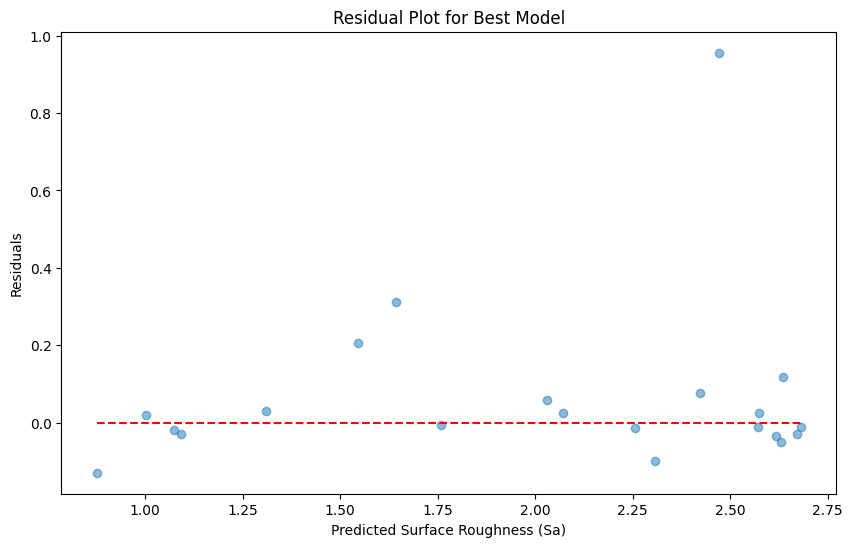

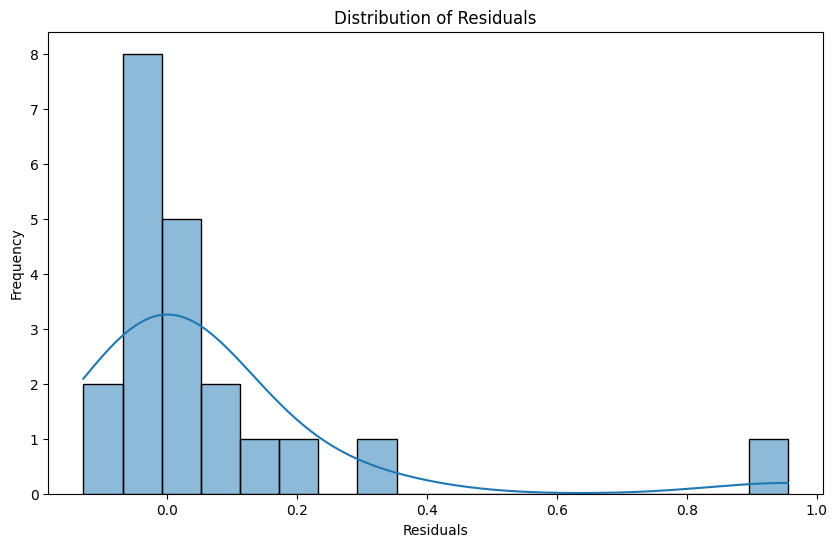

RandomForestRegressor(random_state=42) - Test MAE (CV): 0.6667
RandomForestRegressor(random_state=42) - Test RMSE (CV): 1.1547
RandomForestRegressor(random_state=42) - Test R2 (CV): 0.9992
RandomForestRegressor(random_state=42) - Test MedAE (CV): 0.0000


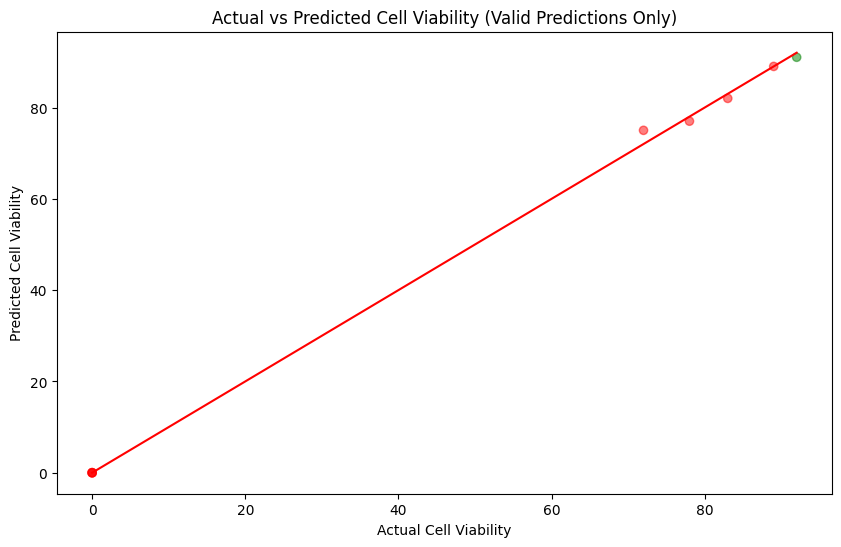

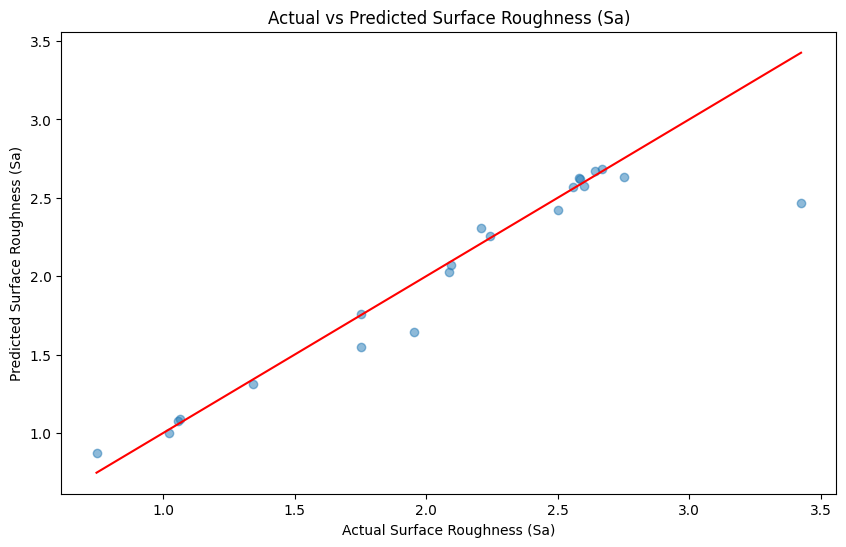

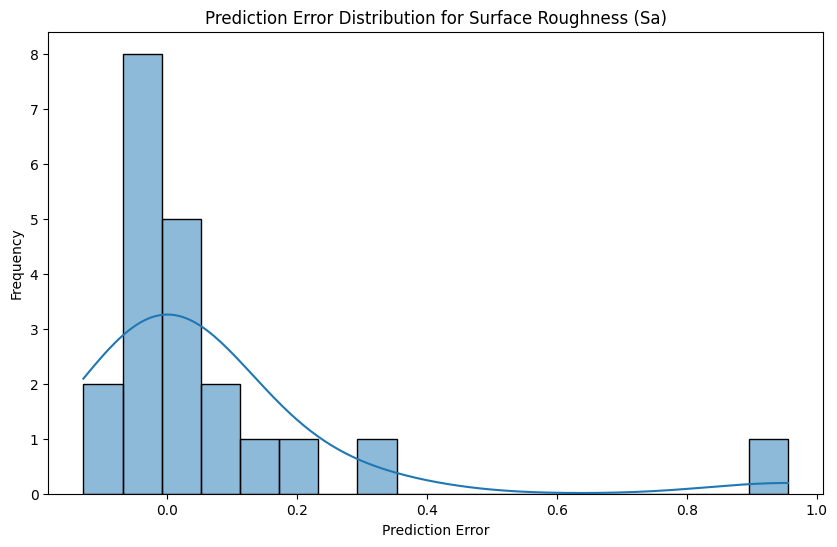

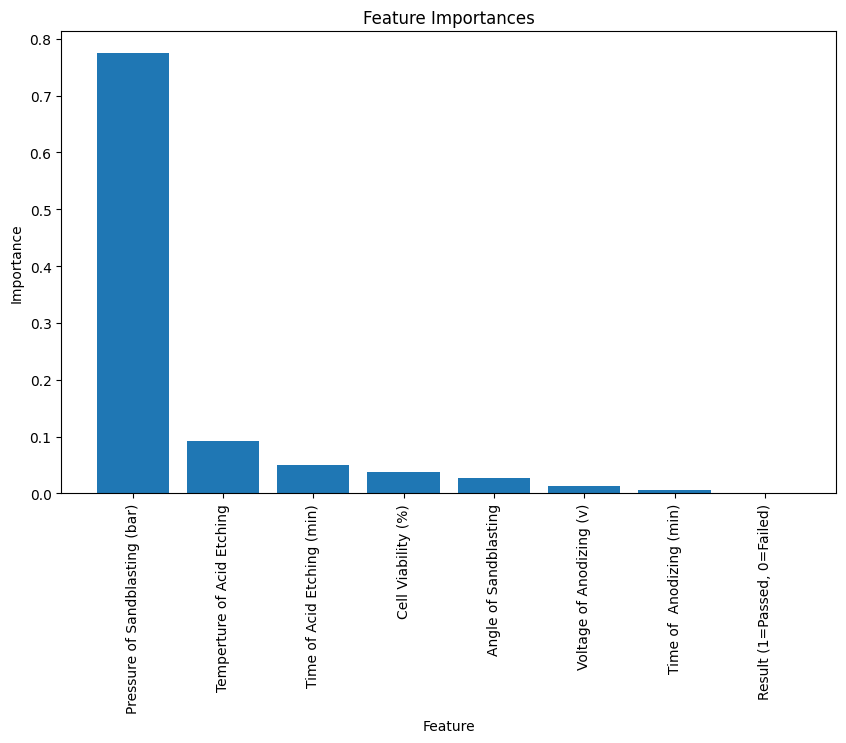

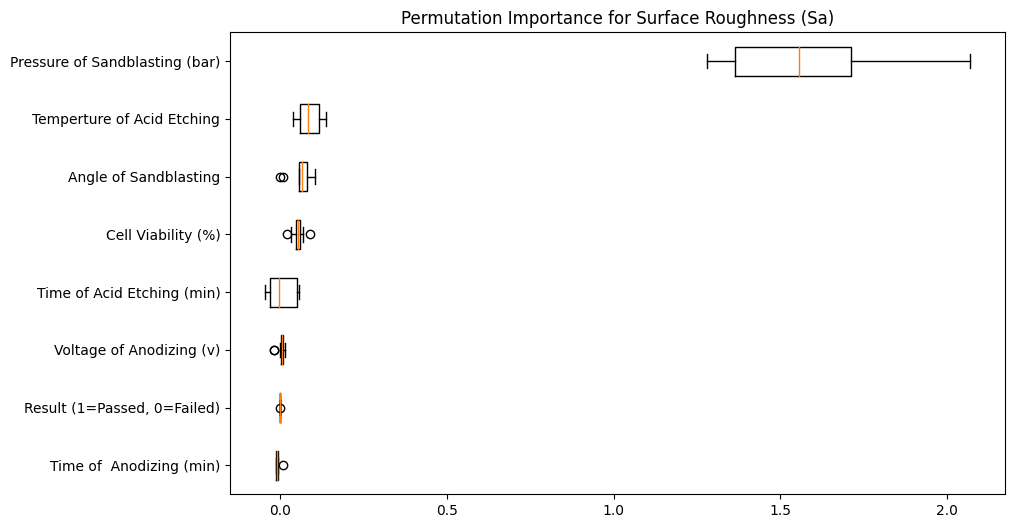

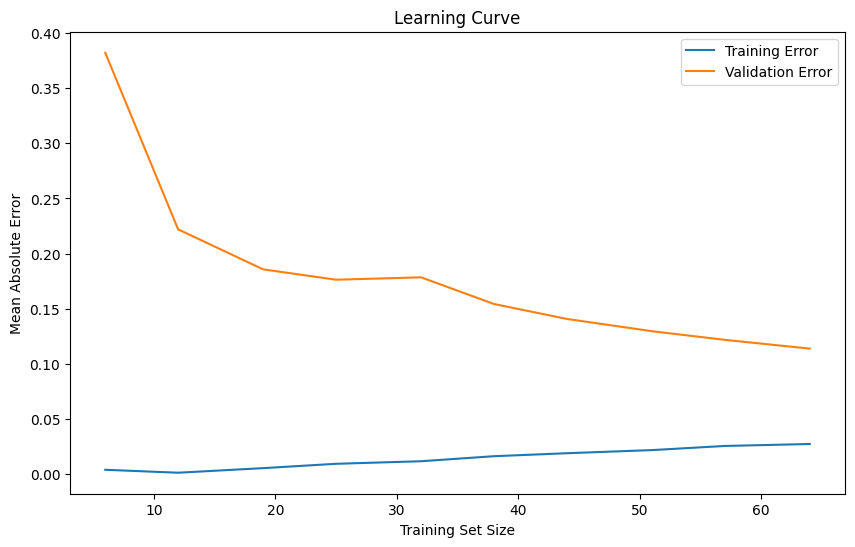

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
from sklearn.inspection import permutation_importance
from sklearn.model_selection import learning_curve, cross_val_score

# Assuming the best models are already trained with the original features
best_model_sa = GradientBoostingRegressor(random_state=42, subsample=0.8)  # Replace with your actual best model
best_model_sa.fit(X_train, y_sa_train)

best_model_cv = RandomForestRegressor(random_state=42)  # Replace with your actual best model
best_model_cv.fit(X_train, y_cv_train)

# Predictions on the test set for Surface Roughness
y_sa_pred = best_model_sa.predict(X_test)

# Apply Surface Roughness Rule: Only make Cell Viability predictions if 1.5 < Sa < 2.5
valid_indices = (y_sa_pred > 1.5) & (y_sa_pred < 2.5)

# Initialize Cell Viability predictions as zeros for all, then update only valid indices
y_cv_pred = np.zeros_like(y_cv_test)
if any(valid_indices):
    y_cv_pred[valid_indices] = best_model_cv.predict(X_test[valid_indices])

# Evaluation metrics for Surface Roughness (Sa)
mae_sa = mean_absolute_error(y_sa_test, y_sa_pred)
rmse_sa = np.sqrt(mean_squared_error(y_sa_test, y_sa_pred))
r2_sa = r2_score(y_sa_test, y_sa_pred)
medae_sa = median_absolute_error(y_sa_test, y_sa_pred)

print(f"{best_model_sa} - Test MAE (Sa): {mae_sa:.4f}")
print(f"{best_model_sa} - Test RMSE (Sa): {rmse_sa:.4f}")
print(f"{best_model_sa} - Test R2 (Sa): {r2_sa:.4f}")
print(f"{best_model_sa} - Test MedAE (Sa): {medae_sa:.4f}")

# Cross-validation scores
cv_scores = cross_val_score(best_model_sa, X_train, y_sa_train, cv=5, scoring='neg_mean_absolute_error')
print(f"Cross-Validation MAE (Sa): {-cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Residuals
residuals = y_sa_test - y_sa_pred

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_sa_pred, residuals, alpha=0.5)
plt.hlines(y=0, xmin=min(y_sa_pred), xmax=max(y_sa_pred), color='r', linestyles='dashed')
plt.xlabel('Predicted Surface Roughness (Sa)')
plt.ylabel('Residuals')
plt.title('Residual Plot for Best Model')
plt.show()

# Distribution of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Evaluate Cell Viability (CV) for valid indices only if there are valid indices
if any(valid_indices):
    mae_cv = mean_absolute_error(y_cv_test[valid_indices], y_cv_pred[valid_indices])
    rmse_cv = np.sqrt(mean_squared_error(y_cv_test[valid_indices], y_cv_pred[valid_indices]))
    r2_cv = r2_score(y_cv_test[valid_indices], y_cv_pred[valid_indices])
    medae_cv = median_absolute_error(y_cv_test[valid_indices], y_cv_pred[valid_indices])

    print(f"{best_model_cv} - Test MAE (CV): {mae_cv:.4f}")
    print(f"{best_model_cv} - Test RMSE (CV): {rmse_cv:.4f}")
    print(f"{best_model_cv} - Test R2 (CV): {r2_cv:.4f}")
    print(f"{best_model_cv} - Test MedAE (CV): {medae_cv:.4f}")

    # Color coding for Cell Viability based on validity
    valid_colors = np.where(y_cv_pred[valid_indices] > 90, 'green', 'red')

    # Scatter plot of actual vs. predicted values for Cell Viability (valid predictions only)
    plt.figure(figsize=(10, 6))
    plt.scatter(y_cv_test[valid_indices], y_cv_pred[valid_indices], alpha=0.5, c=valid_colors)
    plt.plot([min(y_cv_test[valid_indices]), max(y_cv_test[valid_indices])], [min(y_cv_test[valid_indices]), max(y_cv_test[valid_indices])], color='r')
    plt.xlabel('Actual Cell Viability')
    plt.ylabel('Predicted Cell Viability')
    plt.title('Actual vs Predicted Cell Viability (Valid Predictions Only)')
    plt.show()

# Scatter plot of actual vs. predicted values for Surface Roughness
plt.figure(figsize=(10, 6))
plt.scatter(y_sa_test, y_sa_pred, alpha=0.5)
plt.plot([min(y_sa_test), max(y_sa_test)], [min(y_sa_test), max(y_sa_test)], color='r')
plt.xlabel('Actual Surface Roughness (Sa)')
plt.ylabel('Predicted Surface Roughness (Sa)')
plt.title('Actual vs Predicted Surface Roughness (Sa)')
plt.show()

# Additional Visualizations

# Prediction Error Distribution
plt.figure(figsize=(10, 6))
sns.histplot(y_sa_test - y_sa_pred, kde=True)
plt.title('Prediction Error Distribution for Surface Roughness (Sa)')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()

# Feature Importance for the best model
if hasattr(best_model_sa, 'feature_importances_'):
    importances = best_model_sa.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    plt.title('Feature Importances')
    plt.bar(range(len(importances)), importances[indices], align='center')
    plt.xticks(range(len(importances)), X.columns[indices], rotation=90)
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.show()

# Permutation Importance for the best model
perm_importance = permutation_importance(best_model_sa, X_test, y_sa_test, n_repeats=10, random_state=42, n_jobs=-1)
sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.boxplot(perm_importance.importances[sorted_idx].T, vert=False, labels=X.columns[sorted_idx])
plt.title("Permutation Importance for Surface Roughness (Sa)")
plt.show()

# Learning Curves
train_sizes, train_scores, test_scores = learning_curve(best_model_sa, X_train, y_sa_train, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Error')
plt.plot(train_sizes, test_scores_mean, label='Validation Error')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()


### 8. Predictions  :
- Surface Roughness and Cell Viability directly in the prediction function.

    Predicted Surface Roughness (Sa)  Predicted Cell Viability (%) Validity
0                           2.629787                          0.00      red
1                           2.307254                          0.00      red
2                           1.642442                         91.34    green
3                           2.029245                         89.01      red
4                           2.681705                          0.00      red
5                           2.672550                          0.00      red
6                           1.546580                         77.67      red
7                           1.310832                          0.00      red
8                           1.091493                          0.00      red
9                           0.874977                          0.00      red
10                          2.422905                          0.00      red
11                          2.618607                          0.00      red
12          

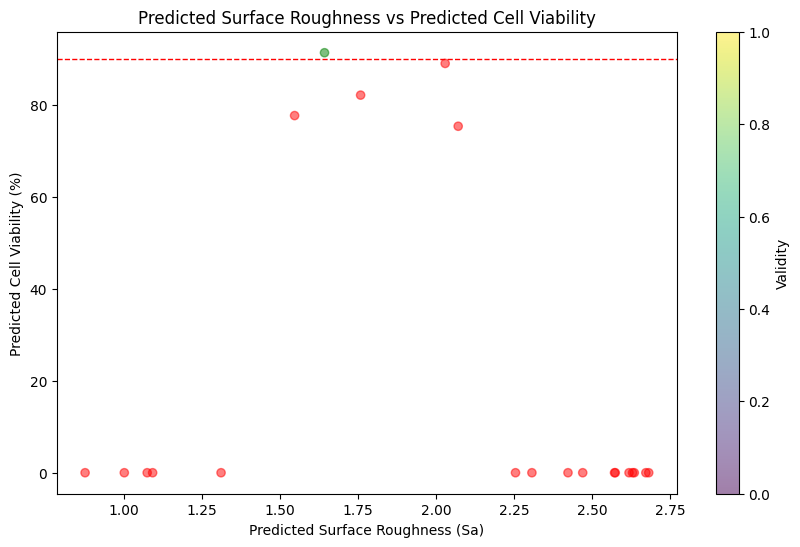

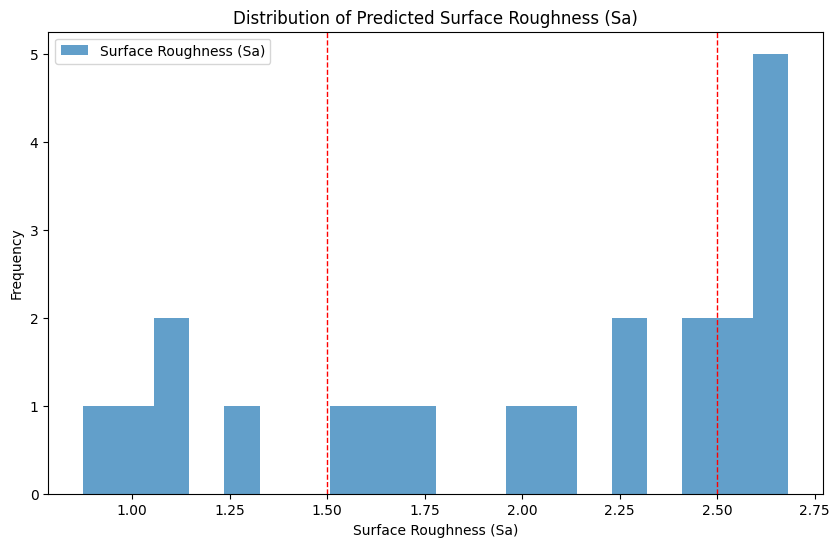

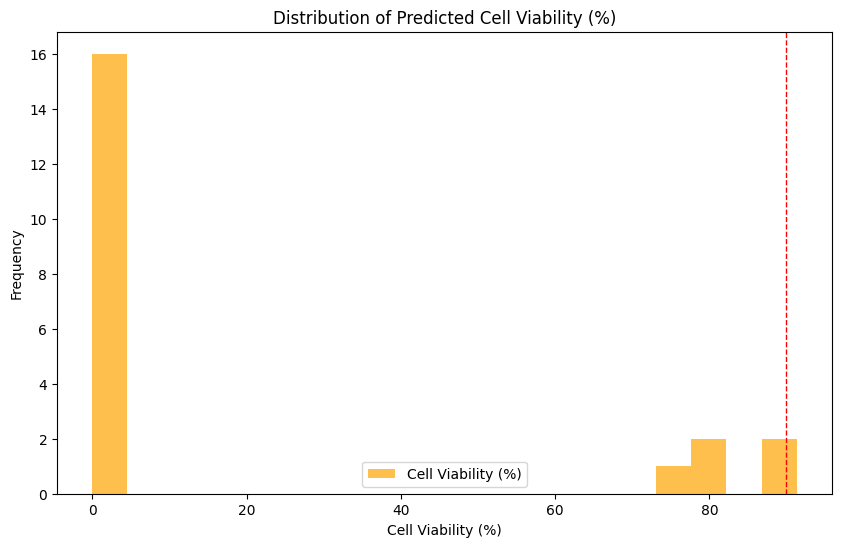

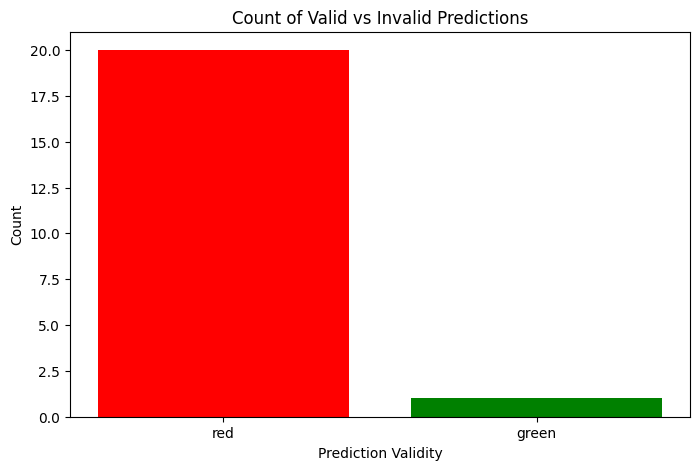

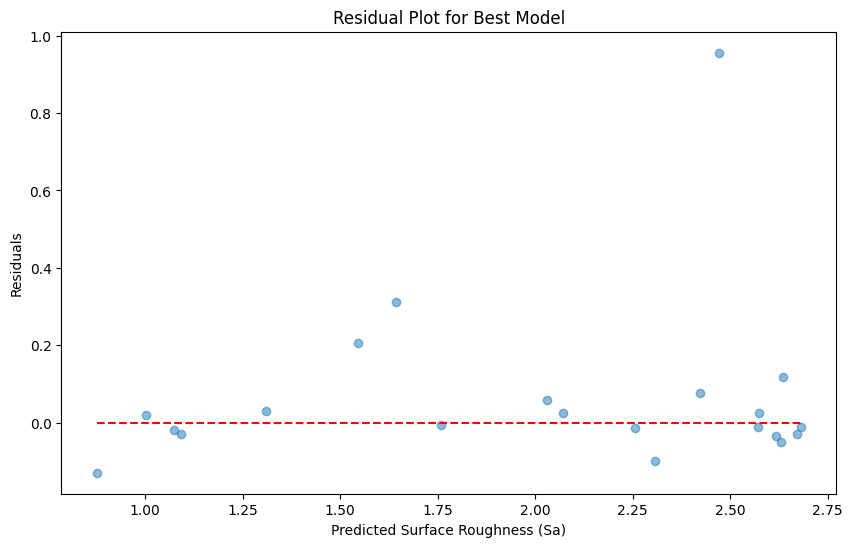

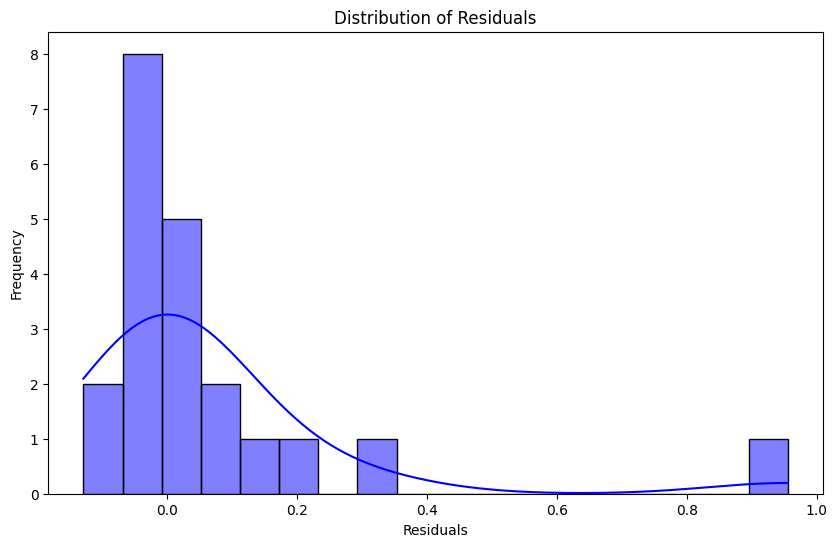

Test MAE (Sa): 0.1077
Test RMSE (Sa): 0.2302
Test R2 (Sa): 0.8879
Test MedAE (Sa): 0.0302


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error

# Function to make predictions with validation rules
def make_predictions(X_new, best_model_sa, best_model_cv):
    y_sa_pred_new = best_model_sa.predict(X_new)
    
    # Initialize Cell Viability predictions as zeros
    y_cv_pred_new = np.zeros(len(y_sa_pred_new))
    
    # Apply Surface Roughness Rule
    valid_indices_new = (y_sa_pred_new > 1.5) & (y_sa_pred_new < 2.5)
    
    if any(valid_indices_new):
        # Predict Cell Viability only for valid Surface Roughness predictions
        y_cv_pred_new[valid_indices_new] = best_model_cv.predict(X_new[valid_indices_new])
    
    # Apply Cell Viability Rule for color coding
    color_codes = np.where(y_cv_pred_new > 90, 'green', 'red')
    
    return y_sa_pred_new, y_cv_pred_new, color_codes

# Example usage with new data
X_new = X_test  # Replace with new data

# Ensure to use the best models used during training
best_model_sa = GradientBoostingRegressor(random_state=42, subsample=0.8)  # Replace with the best model for Sa
best_model_sa.fit(X_train, y_sa_train)
best_model_cv = RandomForestRegressor(random_state=42)  # Replace with the best model for CV
best_model_cv.fit(X_train, y_cv_train)

# Make predictions
y_sa_pred_new, y_cv_pred_new, color_codes = make_predictions(X_new, best_model_sa, best_model_cv)

# Display predictions with color coding
results = pd.DataFrame({
    'Predicted Surface Roughness (Sa)': y_sa_pred_new,
    'Predicted Cell Viability (%)': y_cv_pred_new,
    'Validity': color_codes
})
print(results)

# Visualizations for Predictions

# Enhanced Scatter Plot for Surface Roughness vs Cell Viability with Validity Colors
plt.figure(figsize=(10, 6))
plt.scatter(y_sa_pred_new, y_cv_pred_new, c=color_codes, alpha=0.5)
plt.axhline(90, color='r', linestyle='dashed', linewidth=1)
plt.xlabel('Predicted Surface Roughness (Sa)')
plt.ylabel('Predicted Cell Viability (%)')
plt.title('Predicted Surface Roughness vs Predicted Cell Viability')
plt.colorbar(label='Validity')
plt.show()

# Histograms of predictions
plt.figure(figsize=(10, 6))
plt.hist(y_sa_pred_new, bins=20, alpha=0.7, label='Surface Roughness (Sa)')
plt.axvline(1.5, color='r', linestyle='dashed', linewidth=1)
plt.axvline(2.5, color='r', linestyle='dashed', linewidth=1)
plt.title('Distribution of Predicted Surface Roughness (Sa)')
plt.xlabel('Surface Roughness (Sa)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(y_cv_pred_new, bins=20, alpha=0.7, label='Cell Viability (%)', color='orange')
plt.axvline(90, color='r', linestyle='dashed', linewidth=1)
plt.title('Distribution of Predicted Cell Viability (%)')
plt.xlabel('Cell Viability (%)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Additional Visualization: Bar plot of valid vs invalid predictions
validity_counts = results['Validity'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(validity_counts.index, validity_counts.values, color=['red', 'green'])
plt.xlabel('Prediction Validity')
plt.ylabel('Count')
plt.title('Count of Valid vs Invalid Predictions')
plt.show()

# Residuals
residuals = y_sa_test - y_sa_pred_new

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_sa_pred_new, residuals, alpha=0.5)
plt.hlines(y=0, xmin=min(y_sa_pred_new), xmax=max(y_sa_pred_new), color='r', linestyles='dashed')
plt.xlabel('Predicted Surface Roughness (Sa)')
plt.ylabel('Residuals')
plt.title('Residual Plot for Best Model')
plt.show()

# Distribution of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Evaluation Metrics
mae_sa_new = mean_absolute_error(y_sa_test, y_sa_pred_new)
rmse_sa_new = np.sqrt(mean_squared_error(y_sa_test, y_sa_pred_new))
r2_sa_new = r2_score(y_sa_test, y_sa_pred_new)
medae_sa_new = median_absolute_error(y_sa_test, y_sa_pred_new)

print(f"Test MAE (Sa): {mae_sa_new:.4f}")
print(f"Test RMSE (Sa): {rmse_sa_new:.4f}")
print(f"Test R2 (Sa): {r2_sa_new:.4f}")
print(f"Test MedAE (Sa): {medae_sa_new:.4f}")
